In [14]:
import os
import pandas as pd
import numpy as np
import sys
import warnings
warnings.filterwarnings(action='ignore')

sys.path.append('./Codebase/utility')
sys.path.append('./Codebase/qsar')

from Featurizer import Featurize
from Data_pipeline import QSAR_pipeline


# 1. Molecular descriptors and fingerprints calculation

In [21]:
df = pd.read_csv("/home/labhhc1/Documents/Workspace/D20/Nghi/HIV_IN_Classification_ML/Data/ecoli_pchem.csv", index_col=0)
df.head(2)

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Assay Type,Assay Description,Assay Organism,Assay Variant Mutation,Target Name,Target Organism,Document Journal,pChEMBL,Canonical_Smiles
1173,CHEMBL186155,CCCCC[C@H](CC(=O)NO)C(=O)N[C@H](C(=O)C1CCC[C@H...,IC50,'=',0.7,nM,9.15,NaN,F,In vitro inhibitory activity against Escherich...,Escherichia coli,NaN,Escherichia coli,Escherichia coli,Bioorg Med Chem Lett,9.154902,CCCCC[C@H](CC(=O)NO)C(=O)N[C@H](C(=O)C1CCC[C@H...
1264,CHEMBL369559,CC(C)[C@H](NC(=O)C[C@H](NC(=O)/C=C/c1cccc(F)n1...,IC50,'=',1.0,nM,9.00,NaN,F,Inhibitory concentration of the compound again...,Escherichia coli,NaN,Escherichia coli,Escherichia coli,Bioorg Med Chem Lett,9.000000,CC(C)[C@H](NC(=O)C[C@H](NC(=O)/C=C/c1cccc(F)n1...


In [22]:
path = os.getcwd()
print(path)

/home/labhhc1/Documents/Workspace/D20/Nghi/HIV_IN_Classification_ML/Data_posthoc/raw_data_features/Data_posthoc


In [5]:
path = os.getcwd()

folder = 'raw_data_features'
isExist = os.path.exists(folder)
if not isExist:
    os.makedirs(folder)
save_dir = path+'/'+folder+"/"
fp = Featurize(data=df, smile_col='Smiles', activity_col='pChEMBL Value', m2v_path =f'{path}/Codebase/utility/model_300dim.pkl',
            ID='Molecule ChEMBL ID', save_dir=save_dir, standardize = True, ro5 = 3)
fp.Apply()
os.chdir(path)

STANDARDIZING MOLECULES...


100%|██████████| 634/634 [00:36<00:00, 17.16it/s]


CALCULATING RDK5 FINGERPRINTS...


100%|██████████| 634/634 [00:00<00:00, 1724.45it/s]


CALCULATING RDK6 FINGERPRINTS...


100%|██████████| 634/634 [00:00<00:00, 839.78it/s] 


CALCULATING RDK7 FINGERPRINTS...


100%|██████████| 634/634 [00:01<00:00, 422.79it/s]


CALCULATING ECFP2 FINGERPRINTS...


100%|██████████| 634/634 [00:00<00:00, 7520.35it/s]


CALCULATING ECFP4 FINGERPRINTS...


100%|██████████| 634/634 [00:00<00:00, 5542.01it/s]


CALCULATING ECFP6 FINGERPRINTS...


100%|██████████| 634/634 [00:00<00:00, 3639.79it/s]


CALCULATING MACCs FINGERPRINTS...


100%|██████████| 634/634 [00:00<00:00, 799.08it/s]


CALCULATING AVALON FINGERPRINTS...


100%|██████████| 634/634 [00:00<00:00, 821.40it/s]


CALCULATING PUBCHEM FINGERPRINTS...


100%|██████████| 634/634 [00:09<00:00, 64.83it/s]


CALCULATING MAP4 FINGERPRINTS...


100%|██████████| 634/634 [00:02<00:00, 231.53it/s]


CALCULATING SECFP FINGERPRINTS...


100%|██████████| 634/634 [00:04<00:00, 154.81it/s]


CALCULATING PHARMACOPHORE GOBBI FINGERPRINTS...


100%|██████████| 634/634 [00:26<00:00, 24.09it/s]


CALCULATING PHARMACOPHORE CATS2D FINGERPRINTS...


100%|██████████| 634/634 [00:02<00:00, 275.00it/s]


CALCULATING RDKit descriptors...


100%|██████████| 634/634 [00:10<00:00, 61.96it/s]


CALCULATING Mordred descriptors...


100%|██████████| 634/634 [00:45<00:00, 13.92it/s]


FINISH CALCULATING!


In [6]:
fp

In [9]:
print(data_path)

/home/labhhc1/Documents/Workspace/D20/Nghi/HIV_IN_Classification_ML/Data_posthoc/Data_posthoc


# 2. QSAR pipeline

Data train: (507, 1026)
Data test: (127, 1026)
***************************************************************************


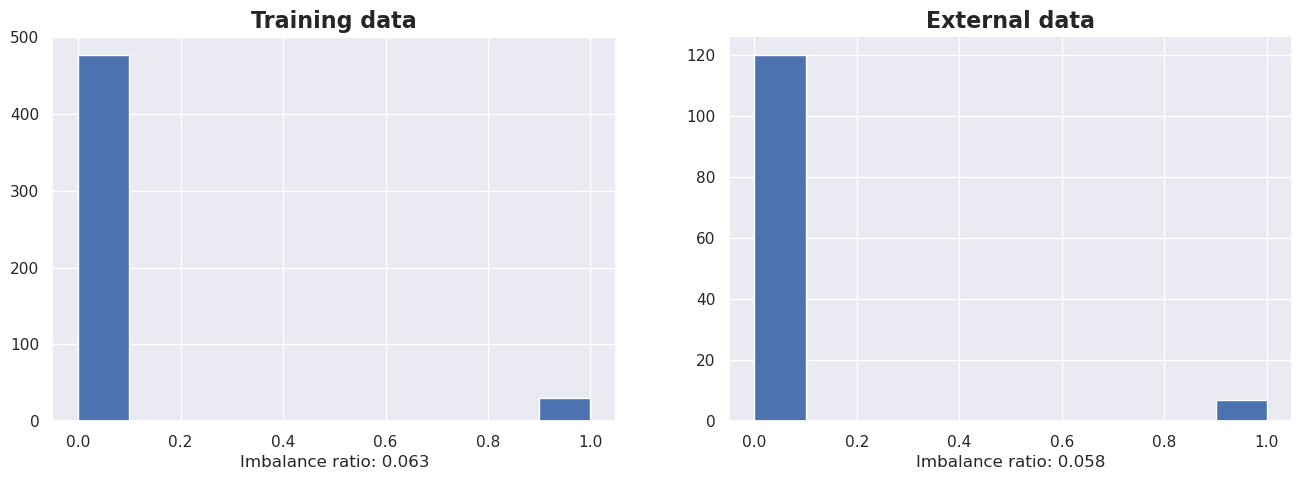

Total duplicated rows-train: 27
Data train before drop duplicates: 507
Data train after drop duplicates: 480
***************************************************************************
Total duplicated rows-test: 3
Data test before drop duplicates: 127
Data test after drop duplicates: 124
***************************************************************************
Index(['685', '748', '749', '931'], dtype='object')
Total similar columns: 4
Data train before drop duplicates: (480, 1026)
Data after drop duplicates: (480, 1022)
***************************************************************************
Data test before drop duplicates: (124, 1026)
Data test after drop duplicates: (124, 1022)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles               480           100.0
Drop_cols ['Canomicalsmiles']
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


Total row-test with missing value 0
(480, 1020) (480,)
>Threshold=0.00, Features=1018
>Threshold=0.05, Features=776
>Threshold=0.10, Features=562
>Threshold=0.15, Features=386
>Threshold=0.20, Features=241


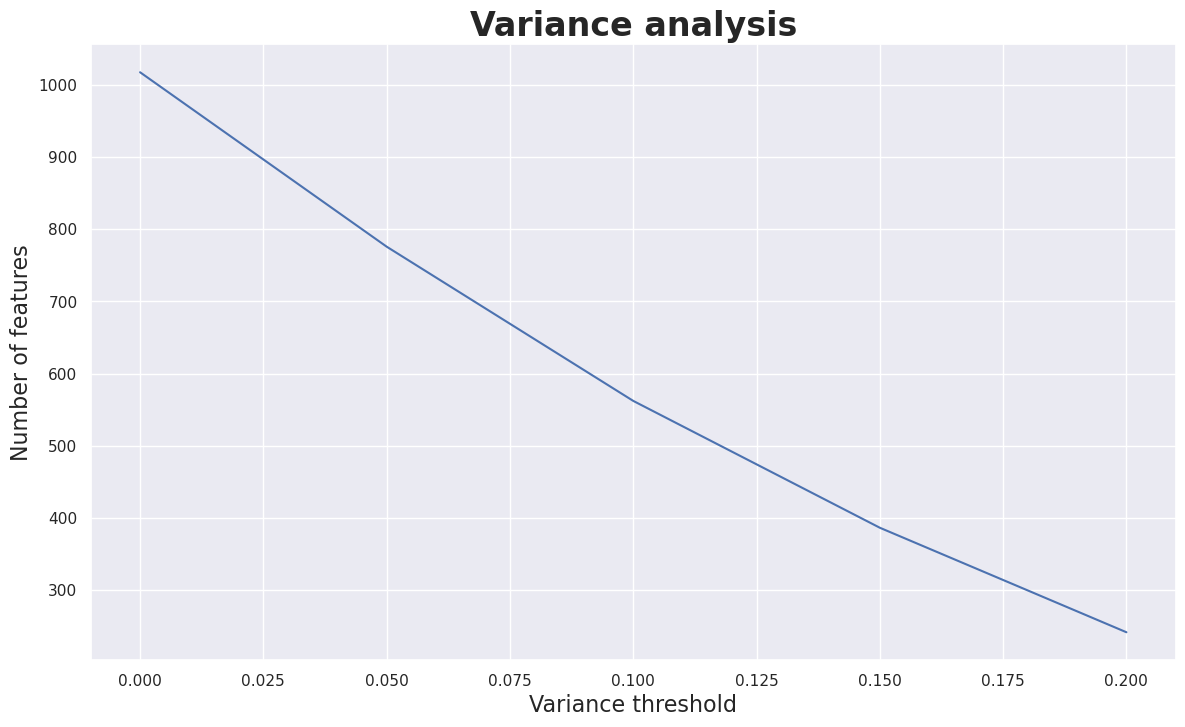

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,8,9,...,1012,1013,1014,1016,1017,1018,1019,1020,1022,1023
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
3,0,0,0,1,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 36
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.608 ± 0.249 (0.667)
>KNN 0.244 ± 0.303 (0.000)
>SVM 0.549 ± 0.337 (0.667)
>RF 0.623 ± 0.253 (0.667)
>ExT 0.613 ± 0.220 (0.667)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.498 ± 0.287 (0.500)
>Grad 0.500 ± 0.310 (0.583)
>XGB 0.582 ± 0.277 (0.667)
>CatB 0.608 ± 0.253 (0.667)
>MLP 0.563 ± 0.244 (0.667)
Data train: (507, 212)
Data test: (127, 212)
***************************************************************************


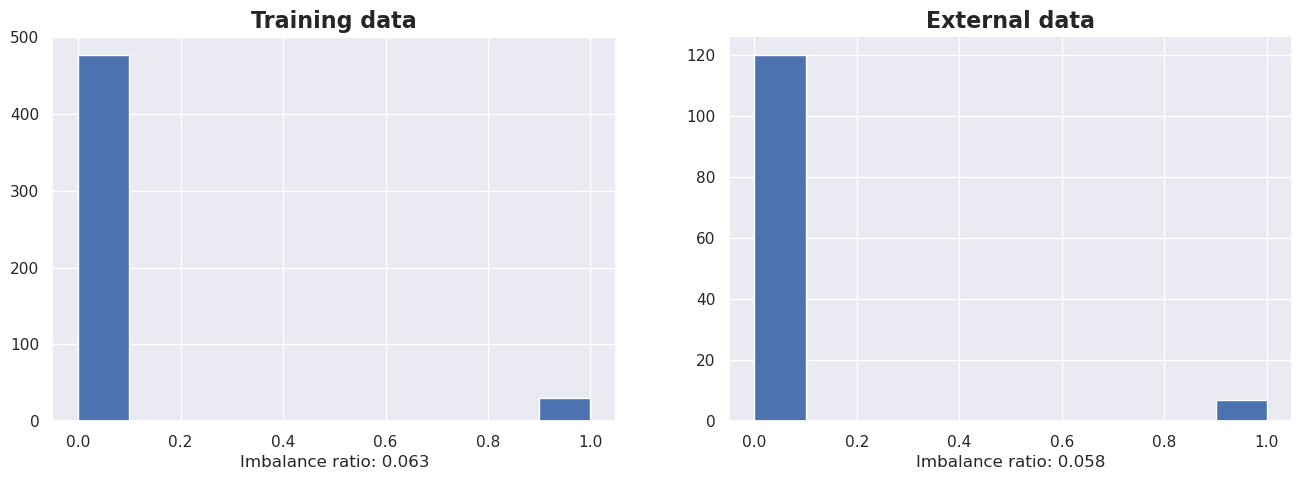

Total duplicated rows-train: 93
Data train before drop duplicates: 507
Data train after drop duplicates: 414
***************************************************************************
Total duplicated rows-test: 8
Data test before drop duplicates: 127
Data test after drop duplicates: 119
***************************************************************************
Index(['30', '40', '41', '70', '91', '111', '113', '120', '122', '125', '126',
       '130', '131', '151', '153', '157', '160', '170', '190'],
      dtype='object')
Total similar columns: 19
Data train before drop duplicates: (414, 212)
Data after drop duplicates: (414, 193)
***************************************************************************
Data test before drop duplicates: (119, 212)
Data test after drop duplicates: (119, 193)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles               414           100.0
Drop_cols [

,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,200,201,202,203,204,205,206,207,208,209


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,200,201,202,203,204,205,206,207,208,209


Total row-test with missing value 0
(414, 191) (414,)
>Threshold=0.00, Features=190
>Threshold=0.05, Features=175
>Threshold=0.10, Features=167
>Threshold=0.15, Features=163
>Threshold=0.20, Features=161
>Threshold=0.25, Features=158
>Threshold=0.30, Features=155
>Threshold=0.35, Features=155
>Threshold=0.40, Features=153
>Threshold=0.45, Features=147
>Threshold=0.50, Features=142
>Threshold=0.55, Features=139
>Threshold=0.60, Features=138
>Threshold=0.65, Features=133
>Threshold=0.70, Features=130
>Threshold=0.75, Features=128
>Threshold=0.80, Features=128
>Threshold=0.85, Features=125
>Threshold=0.90, Features=123
>Threshold=0.95, Features=120


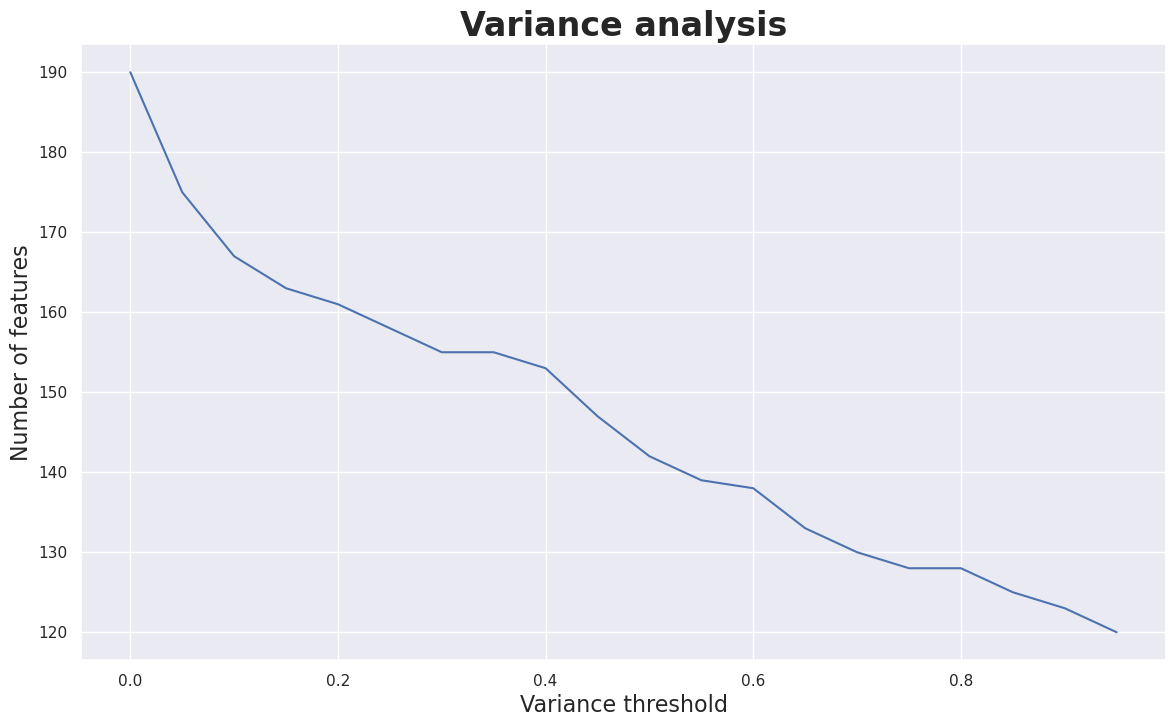

***************************************************************************


,pChEMBL Value,0,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0,4,0,0,0,4,2,2,0,2,...,6.0,12.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,0,2,0,0,0,0,0,0,...,11.0,24.0,30.0,22.0,18.0,12.0,4.0,0.0,0.0,0.0
2,1,2,0,0,0,0,0,0,0,0,...,18.0,38.0,44.0,34.0,22.0,24.0,24.0,22.0,18.0,16.0
3,0,2,0,2,0,0,0,0,0,0,...,11.0,22.0,22.0,8.0,8.0,16.0,18.0,12.0,4.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,6.0,12.0,12.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


Remove by IQR without handling
Total data remove on Train 411
Total data remove on Test 119
Number of good features: 6
Number of bad features with data remove > 0: 88
***************************************************************************
Uniform Transformer technique
Total data remove on Train 402
Total data remove on Test 116
Number of good features: 72
Number of bad features with data remove > 0: 22
***************************************************************************
Handling with KBin method
////// ['43', '72', '75', '77', '79', '83', '86', '139', '143', '144', '145', '146', '147', '148', '149', '181', '182', '183', '184', '185', '186', '187'] 22
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 72
Number of bad features with data remove > 0: 0
***************************************************************************
***************************************************************************
Total outlier remove by LOF: 15
**************

/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.314 ± 0.308 (0.333)
>Grad 0.342 ± 0.298 (0.367)
>XGB 0.361 ± 0.314 (0.400)
>CatB 0.252 ± 0.307 (0.000)
>MLP 0.377 ± 0.321 (0.400)
Data train: (507, 2050)
Data test: (127, 2050)
***************************************************************************


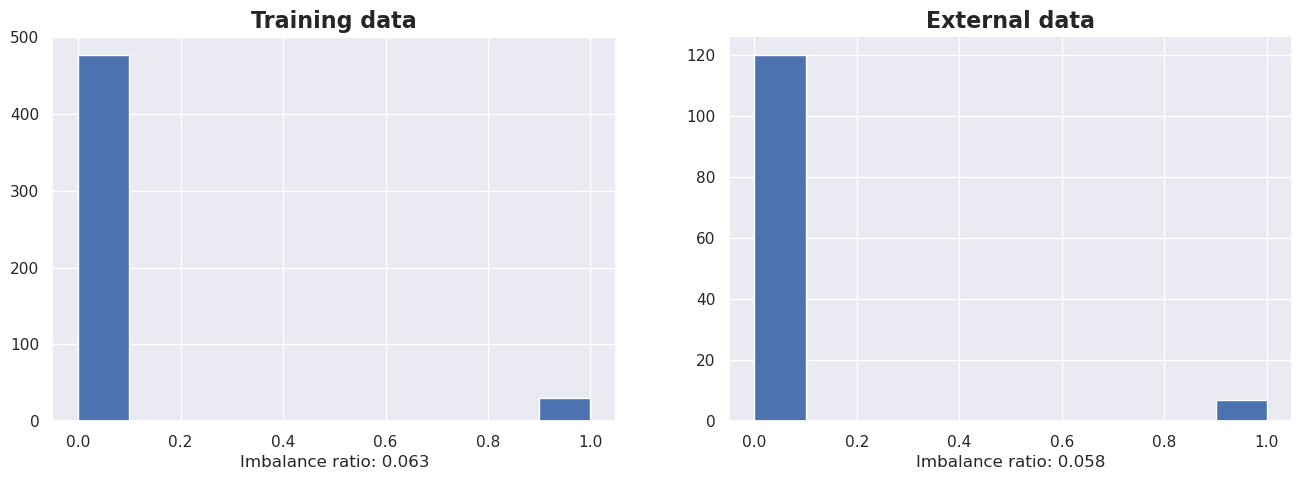

Total duplicated rows-train: 49
Data train before drop duplicates: 507
Data train after drop duplicates: 458
***************************************************************************
Total duplicated rows-test: 5
Data test before drop duplicates: 127
Data test after drop duplicates: 122
***************************************************************************
Index(['2', '3', '6', '7', '8', '9', '10', '12', '15', '16',
       ...
       '2036', '2037', '2039', '2040', '2041', '2042', '2043', '2045', '2046',
       '2047'],
      dtype='object', length=1494)
Total similar columns: 1494
Data train before drop duplicates: (458, 2050)
Data after drop duplicates: (458, 556)
***************************************************************************
Data test before drop duplicates: (122, 2050)
Data test after drop duplicates: (122, 556)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles     

,pChEMBL Value,0,1,4,5,11,13,14,22,29,...,1998,2000,2001,2004,2009,2018,2033,2034,2038,2044


Total row-train with missing value 0


,pChEMBL Value,0,1,4,5,11,13,14,22,29,...,1998,2000,2001,2004,2009,2018,2033,2034,2038,2044


Total row-test with missing value 0
(458, 554) (458,)
>Threshold=0.00, Features=553
>Threshold=0.05, Features=114
>Threshold=0.10, Features=58
>Threshold=0.15, Features=36
>Threshold=0.20, Features=20


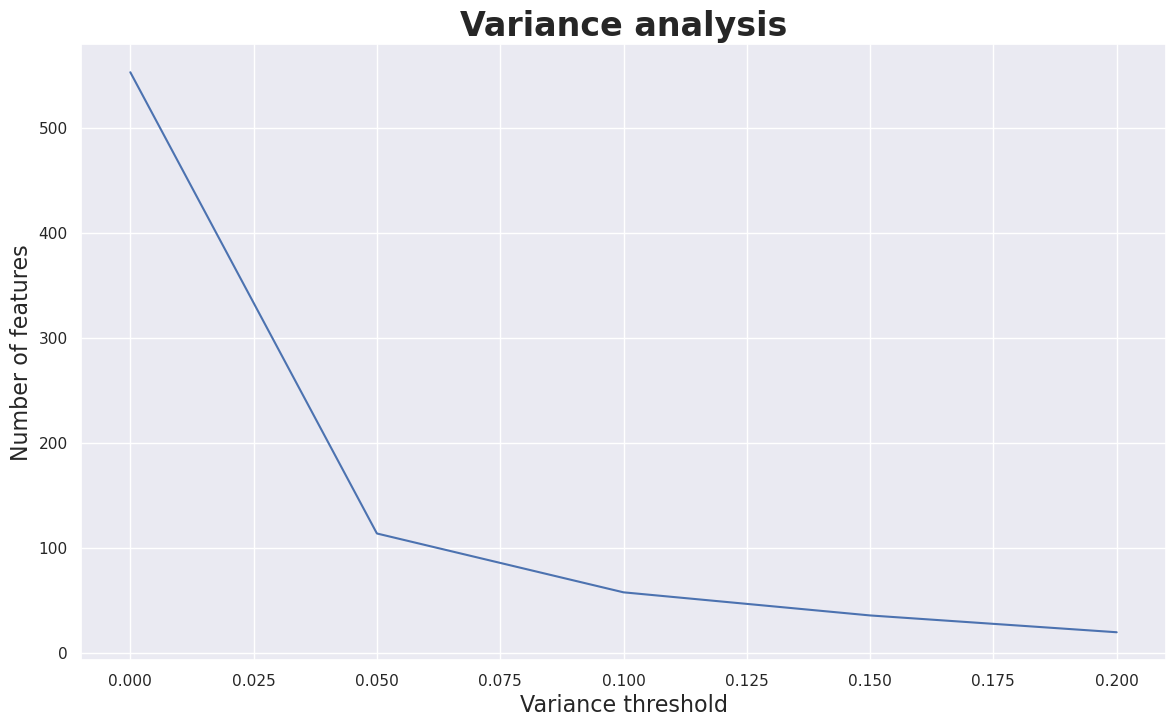

***************************************************************************


,pChEMBL Value,1,13,31,41,74,80,114,117,140,...,1855,1866,1873,1911,1917,1921,1928,1970,2004,2038
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 0
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.452 ± 0.302 (0.500)
>KNN 0.022 ± 0.120 (0.000)
>SVM 0.433 ± 0.334 (0.500)
>RF 0.430 ± 0.310 (0.500)
>ExT 0.446 ± 0.306 (0.500)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.469 ± 0.318 (0.500)
>Grad 0.399 ± 0.307 (0.400)
>XGB 0.379 ± 0.323 (0.450)
>CatB 0.401 ± 0.315 (0.500)
>MLP 0.385 ± 0.295 (0.500)
Data train: (507, 2050)
Data test: (127, 2050)
***************************************************************************


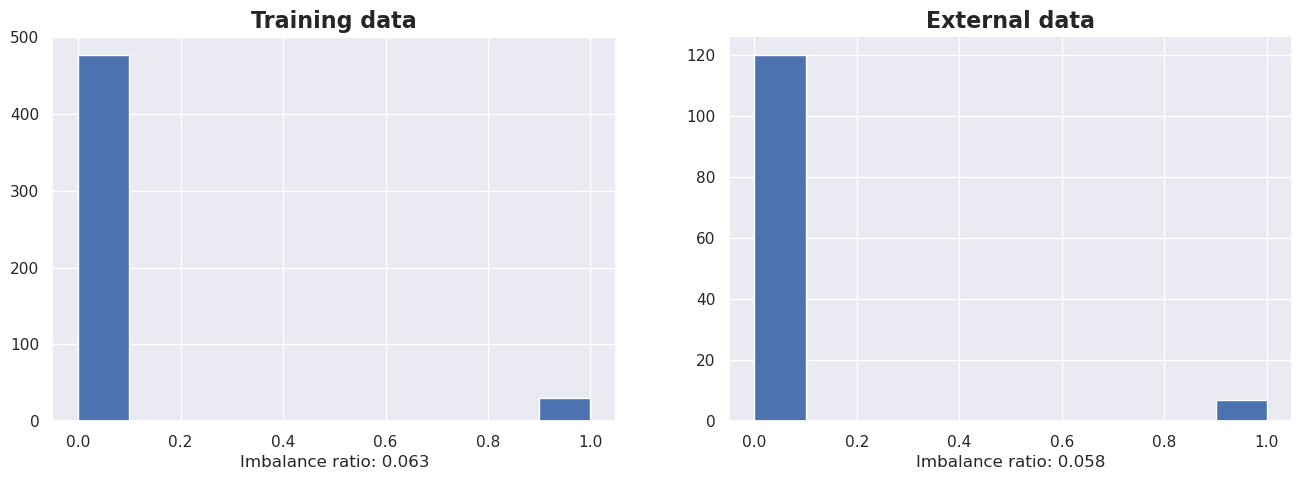

Total duplicated rows-train: 27
Data train before drop duplicates: 507
Data train after drop duplicates: 480
***************************************************************************
Total duplicated rows-test: 3
Data test before drop duplicates: 127
Data test after drop duplicates: 124
***************************************************************************
Index(['3', '6', '7', '10', '15', '17', '19', '20', '21', '26',
       ...
       '2013', '2014', '2022', '2024', '2025', '2029', '2030', '2036', '2040',
       '2047'],
      dtype='object', length=643)
Total similar columns: 643
Data train before drop duplicates: (480, 2050)
Data after drop duplicates: (480, 1407)
***************************************************************************
Data test before drop duplicates: (124, 2050)
Data test after drop duplicates: (124, 1407)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles  

,pChEMBL Value,0,1,2,4,5,8,9,11,12,...,2035,2037,2038,2039,2041,2042,2043,2044,2045,2046


Total row-train with missing value 0


,pChEMBL Value,0,1,2,4,5,8,9,11,12,...,2035,2037,2038,2039,2041,2042,2043,2044,2045,2046


Total row-test with missing value 0
(480, 1405) (480,)
>Threshold=0.00, Features=1404
>Threshold=0.05, Features=180
>Threshold=0.10, Features=83
>Threshold=0.15, Features=51
>Threshold=0.20, Features=26


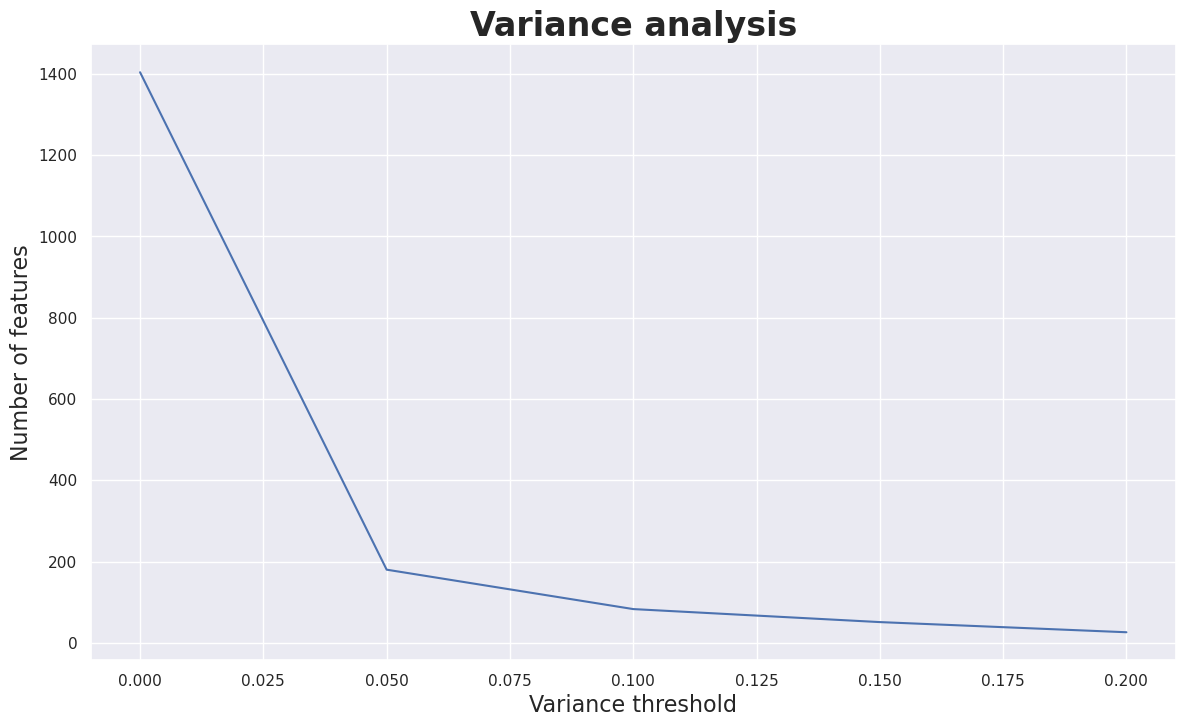

***************************************************************************


,pChEMBL Value,1,13,16,27,29,31,41,64,74,...,1921,1928,1966,1970,1977,1988,1993,2004,2038,2041
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 0
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.529 ± 0.269 (0.500)
>KNN 0.220 ± 0.237 (0.000)
>SVM 0.462 ± 0.294 (0.500)
>RF 0.443 ± 0.283 (0.450)
>ExT 0.547 ± 0.256 (0.571)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.490 ± 0.218 (0.500)
>Grad 0.470 ± 0.263 (0.500)
>XGB 0.437 ± 0.258 (0.422)
>CatB 0.415 ± 0.269 (0.400)
>MLP 0.452 ± 0.249 (0.400)
Data train: (507, 4098)
Data test: (127, 4098)
***************************************************************************


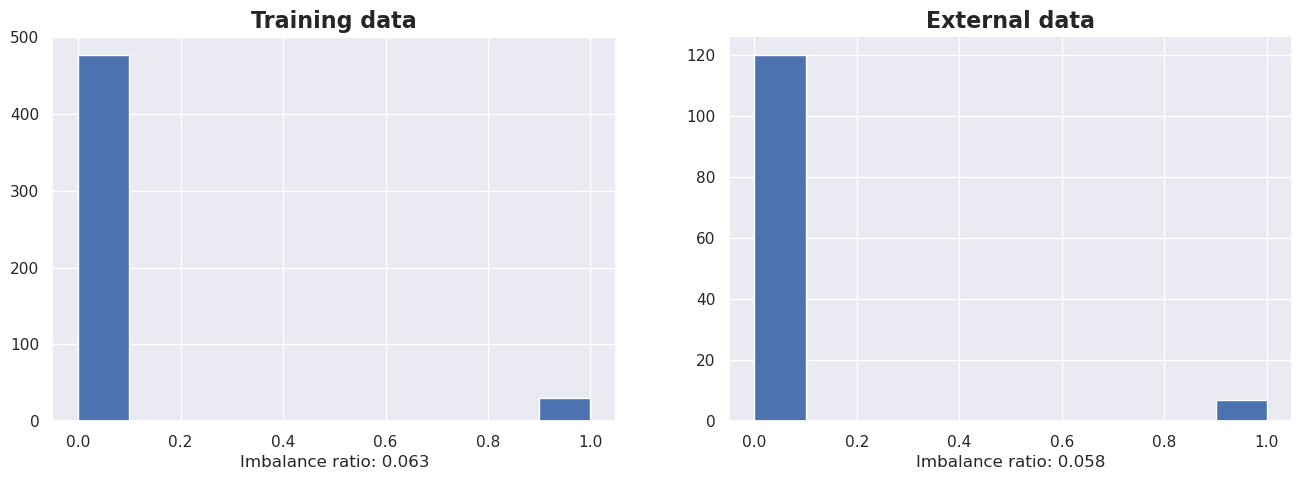

Total duplicated rows-train: 17
Data train before drop duplicates: 507
Data train after drop duplicates: 490
***************************************************************************
Total duplicated rows-test: 2
Data test before drop duplicates: 127
Data test after drop duplicates: 125
***************************************************************************
Index(['4', '12', '18', '24', '27', '42', '43', '44', '46', '49',
       ...
       '4081', '4082', '4083', '4084', '4088', '4090', '4091', '4093', '4094',
       '4095'],
      dtype='object', length=1573)
Total similar columns: 1573
Data train before drop duplicates: (490, 4098)
Data after drop duplicates: (490, 2525)
***************************************************************************
Data test before drop duplicates: (125, 4098)
Data test after drop duplicates: (125, 2525)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmil

,pChEMBL Value,0,1,2,3,5,6,7,8,9,...,4072,4073,4076,4079,4080,4085,4086,4087,4089,4092


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,5,6,7,8,9,...,4072,4073,4076,4079,4080,4085,4086,4087,4089,4092


Total row-test with missing value 0
(490, 2523) (490,)
>Threshold=0.00, Features=2522
>Threshold=0.05, Features=237
>Threshold=0.10, Features=94
>Threshold=0.15, Features=54
>Threshold=0.20, Features=27


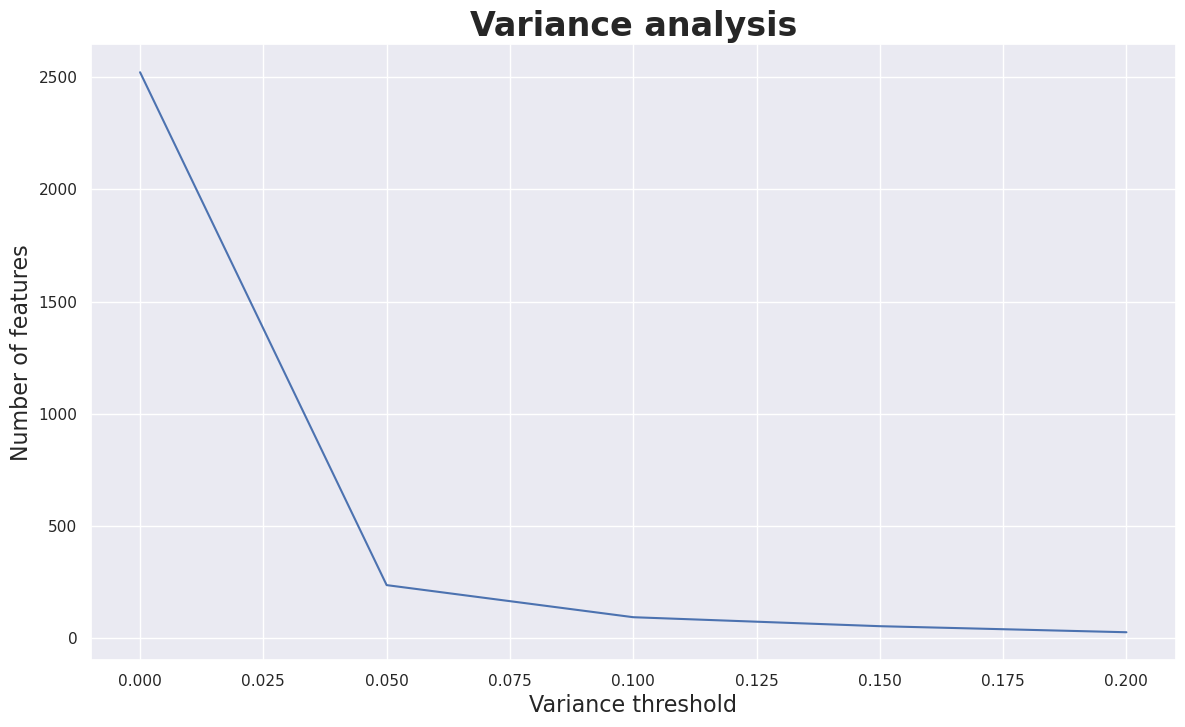

***************************************************************************


,pChEMBL Value,7,13,29,31,41,88,94,117,140,...,3921,3928,3959,3963,4014,4048,4052,4086,4089,4092
0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 0
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.502 ± 0.188 (0.500)
>KNN 0.290 ± 0.239 (0.450)
>SVM 0.481 ± 0.224 (0.500)
>RF 0.470 ± 0.228 (0.500)
>ExT 0.515 ± 0.251 (0.500)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.453 ± 0.188 (0.450)
>Grad 0.512 ± 0.236 (0.500)
>XGB 0.502 ± 0.212 (0.500)
>CatB 0.498 ± 0.188 (0.500)
>MLP 0.481 ± 0.199 (0.500)
Data train: (507, 169)
Data test: (127, 169)
***************************************************************************


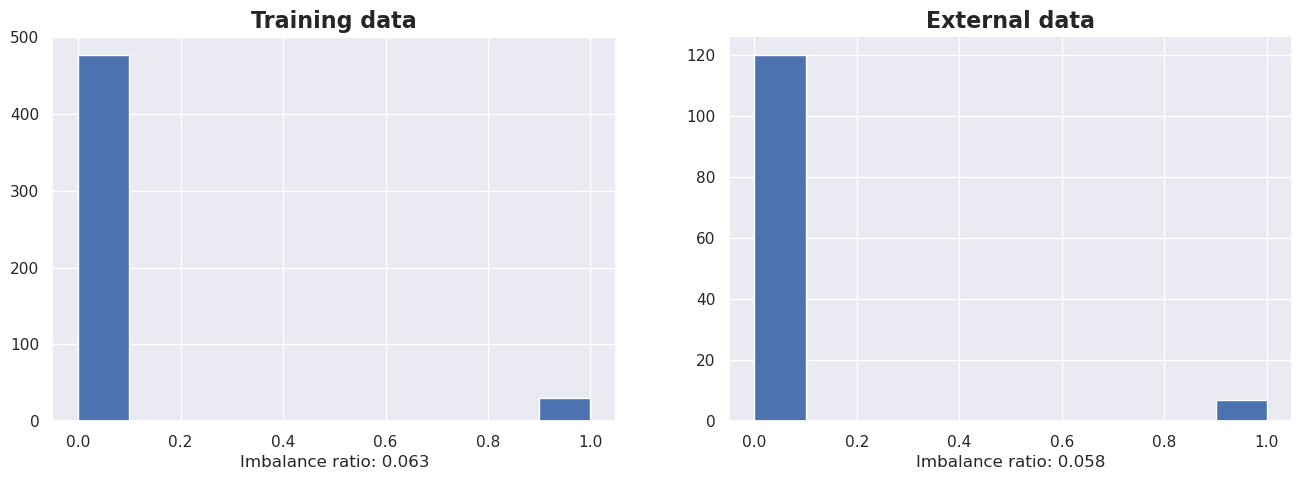

Total duplicated rows-train: 77
Data train before drop duplicates: 507
Data train after drop duplicates: 430
***************************************************************************
Total duplicated rows-test: 5
Data test before drop duplicates: 127
Data test after drop duplicates: 122
***************************************************************************
Index(['1', '2', '3', '4', '5', '6', '7', '9', '10', '12', '14', '15', '16',
       '18', '20', '21', '27', '31', '33', '35', '44', '58', '60', '61', '63',
       '143', '166'],
      dtype='object')
Total similar columns: 27
Data train before drop duplicates: (430, 169)
Data after drop duplicates: (430, 142)
***************************************************************************
Data test before drop duplicates: (122, 169)
Data test after drop duplicates: (122, 142)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles           

,pChEMBL Value,0,8,11,13,17,19,22,23,24,...,156,157,158,159,160,161,162,163,164,165


Total row-train with missing value 0


,pChEMBL Value,0,8,11,13,17,19,22,23,24,...,156,157,158,159,160,161,162,163,164,165


Total row-test with missing value 0
(430, 140) (430,)
>Threshold=0.00, Features=139
>Threshold=0.05, Features=113
>Threshold=0.10, Features=100
>Threshold=0.15, Features=82
>Threshold=0.20, Features=62


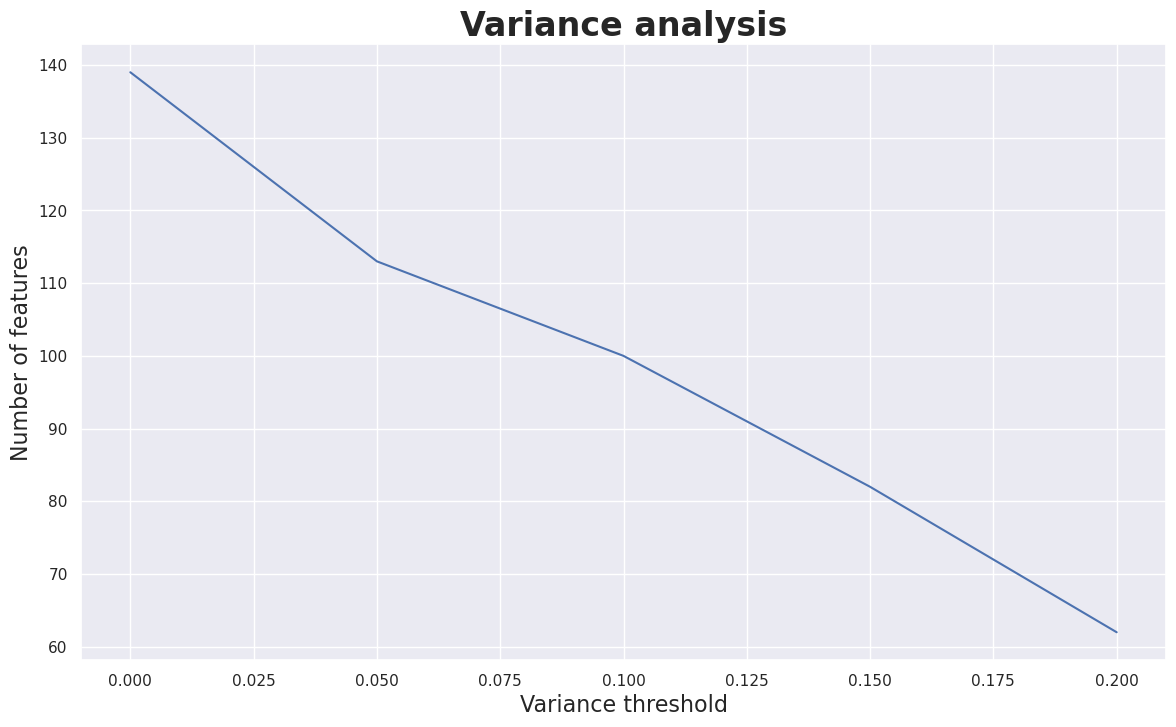

***************************************************************************


,pChEMBL Value,19,23,24,25,36,37,38,42,43,...,155,156,157,158,159,160,161,162,163,164
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,1,1
2,1,0,1,0,0,0,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
4,0,0,1,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 8
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.476 ± 0.294 (0.500)
>KNN 0.217 ± 0.269 (0.000)
>SVM 0.500 ± 0.302 (0.500)
>RF 0.528 ± 0.307 (0.583)
>ExT 0.608 ± 0.254 (0.667)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.481 ± 0.248 (0.500)
>Grad 0.548 ± 0.245 (0.619)
>XGB 0.516 ± 0.285 (0.500)
>CatB 0.574 ± 0.271 (0.667)
>MLP 0.535 ± 0.266 (0.583)
Data train: (507, 1026)
Data test: (127, 1026)
***************************************************************************


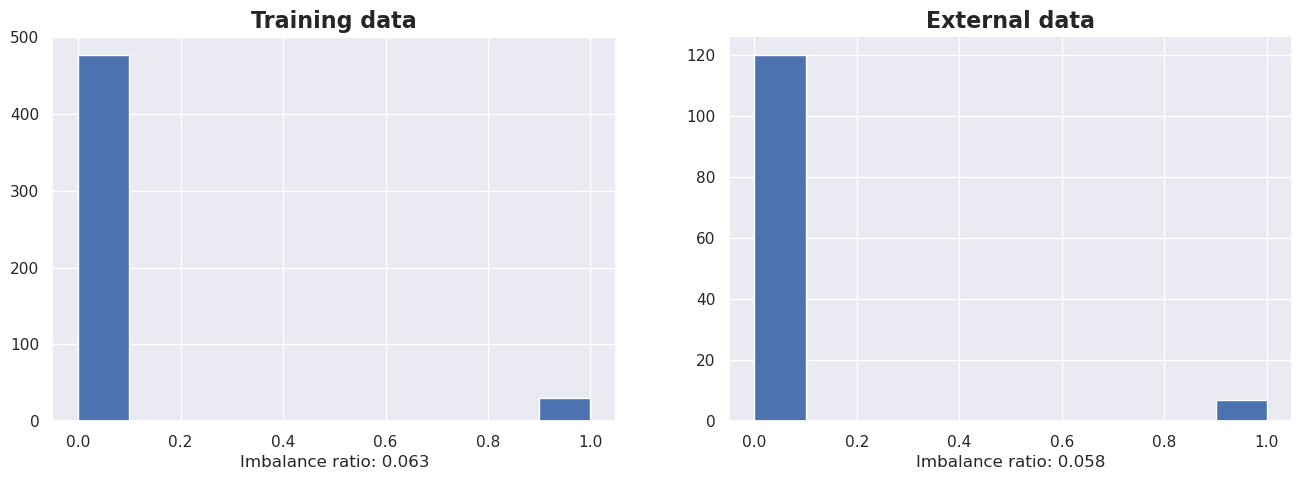

Total duplicated rows-train: 10
Data train before drop duplicates: 507
Data train after drop duplicates: 497
***************************************************************************
Total duplicated rows-test: 1
Data test before drop duplicates: 127
Data test after drop duplicates: 126
***************************************************************************
Index([], dtype='object')
Total similar columns: 0
Data train before drop duplicates: (497, 1026)
Data after drop duplicates: (497, 1026)
***************************************************************************
Data test before drop duplicates: (126, 1026)
Data test after drop duplicates: (126, 1026)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles               497           100.0
Drop_cols ['Canomicalsmiles']
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


Total row-test with missing value 0
(497, 1024) (497,)
>Threshold=0.00, Features=1024
>Threshold=0.05, Features=1024
>Threshold=0.10, Features=1022
>Threshold=0.15, Features=1019
>Threshold=0.20, Features=935


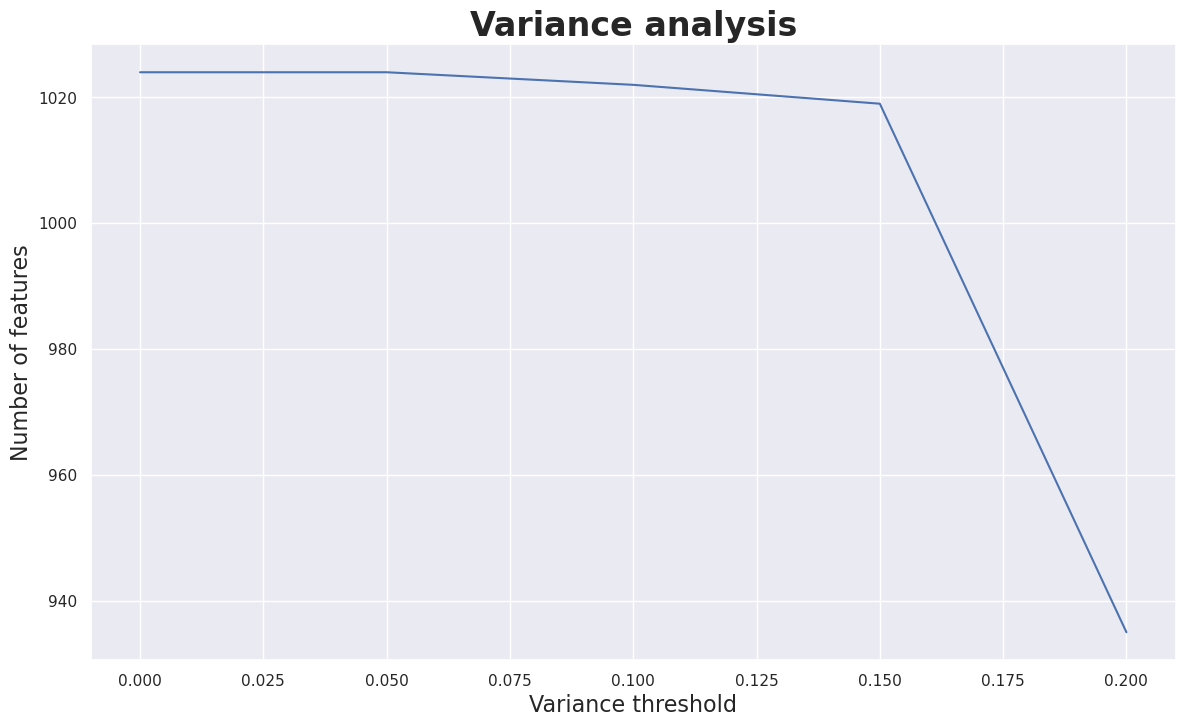

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,1,1,0,0,0,1,1,1,0,...,0,0,1,0,0,1,1,1,1,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,1,1,0,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,1,1,...,0,0,1,0,0,0,1,1,1,0
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 0
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.543 ± 0.302 (0.500)
>KNN 0.548 ± 0.198 (0.500)
>SVM 0.482 ± 0.274 (0.500)
>RF 0.532 ± 0.287 (0.500)
>ExT 0.518 ± 0.296 (0.500)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.524 ± 0.302 (0.619)
>Grad 0.527 ± 0.319 (0.500)
>XGB 0.554 ± 0.308 (0.500)
>CatB 0.526 ± 0.296 (0.500)
>MLP 0.528 ± 0.292 (0.500)
Data train: (507, 1614)
Data test: (127, 1614)
***************************************************************************


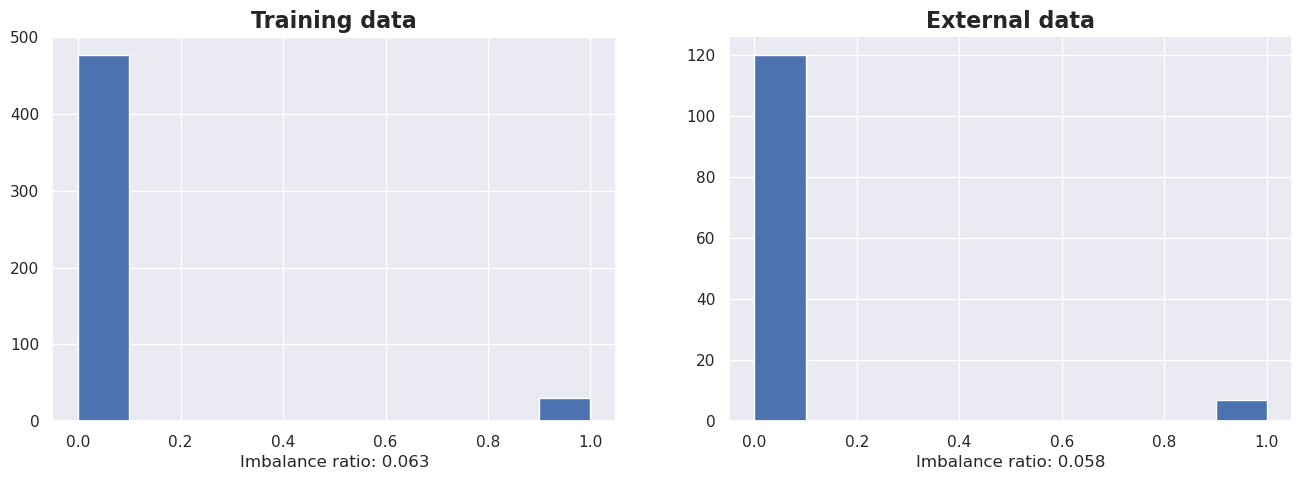

Total duplicated rows-train: 9
Data train before drop duplicates: 507
Data train after drop duplicates: 498
***************************************************************************
Total duplicated rows-test: 0
Data test before drop duplicates: 127
Data test after drop duplicates: 127
***************************************************************************
Index(['ABCGG', 'nI', 'nBondsA', 'SpAbs_Dt', 'SpMax_Dt', 'SpDiam_Dt',
       'SpAD_Dt', 'SpMAD_Dt', 'LogEE_Dt', 'SM1_Dt',
       ...
       'n11FARing', 'n12FARing', 'n4FAHRing', 'n5FAHRing', 'n6FAHRing',
       'n7FAHRing', 'n8FAHRing', 'n11FAHRing', 'n12FAHRing', 'MWC01'],
      dtype='object', length=377)
Total similar columns: 377
Data train before drop duplicates: (498, 1614)
Data after drop duplicates: (498, 1237)
***************************************************************************
Data test before drop duplicates: (127, 1614)
Data test after drop duplicates: (127, 1237)
********************************************

,pChEMBL Value,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2


Total row-train with missing value 0


,pChEMBL Value,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2


Total row-test with missing value 0
(498, 1139) (498,)
>Threshold=0.00, Features=1138
>Threshold=0.05, Features=780
>Threshold=0.10, Features=728
>Threshold=0.15, Features=690
>Threshold=0.20, Features=655
>Threshold=0.25, Features=637
>Threshold=0.30, Features=623
>Threshold=0.35, Features=618
>Threshold=0.40, Features=609
>Threshold=0.45, Features=598
>Threshold=0.50, Features=586
>Threshold=0.55, Features=583
>Threshold=0.60, Features=583
>Threshold=0.65, Features=576
>Threshold=0.70, Features=575
>Threshold=0.75, Features=573
>Threshold=0.80, Features=560
>Threshold=0.85, Features=556
>Threshold=0.90, Features=550
>Threshold=0.95, Features=549


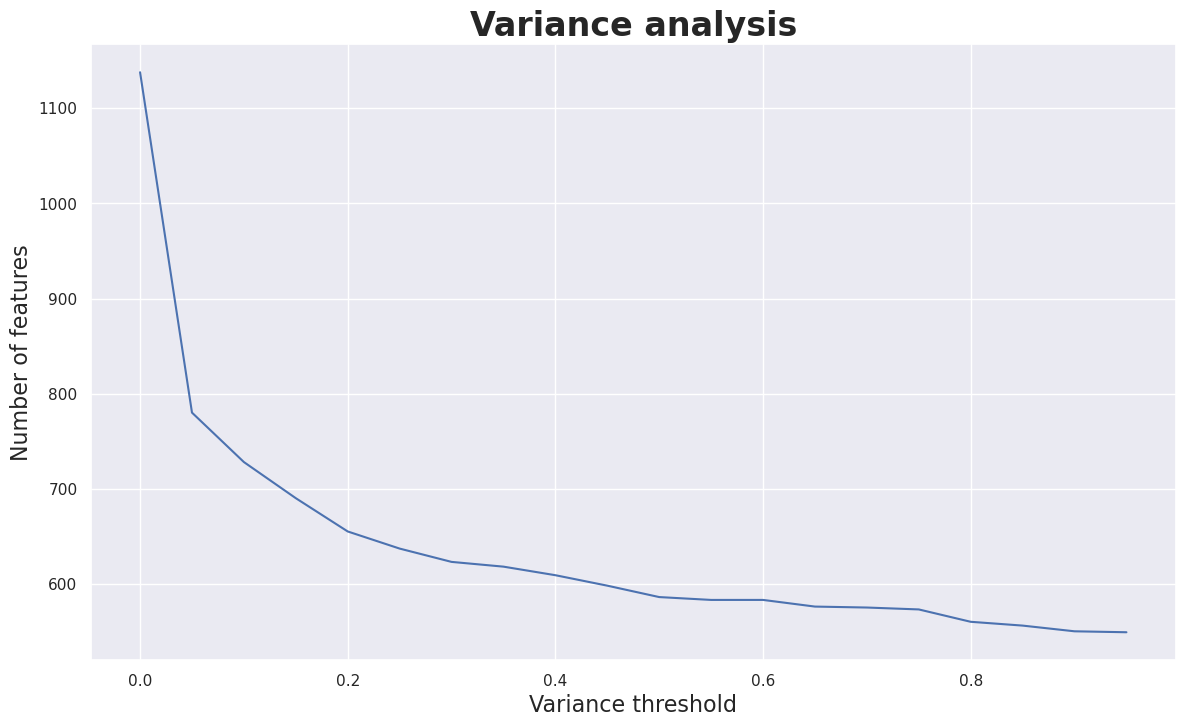

***************************************************************************


,pChEMBL Value,nAcid,nBase,SpAbs_A,SpAD_A,LogEE_A,VE1_A,VE3_A,VR1_A,VR2_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,0,1,38.989563,38.989563,4.419651,4.856806,2.743532,253.947704,7.935866,...,11.001783,69.521365,444.153266,7.931308,2350.0,76.0,186.0,239.0,14.680556,6.666667
1,0,0,0,18.702561,18.702561,3.641111,3.587093,1.682807,66.543193,4.436213,...,9.568923,61.076151,259.946556,12.378407,357.0,21.0,78.0,91.0,5.916667,3.250000
2,1,0,1,42.844343,42.844343,4.419740,4.415173,2.678969,1439.529408,43.622103,...,10.264408,82.809035,448.191069,7.727432,4009.0,48.0,170.0,196.0,9.861111,7.277778
3,0,0,0,24.061002,24.061002,3.855407,3.959929,2.018080,104.381578,5.493767,...,9.591581,65.368443,280.051778,9.033928,789.0,25.0,94.0,107.0,6.916667,4.305556
4,0,0,0,30.484351,30.484351,4.104141,4.211335,2.313248,222.269589,9.261233,...,9.973154,72.264906,330.157957,7.177347,1409.0,38.0,124.0,144.0,7.888889,5.277778


Remove by IQR without handling
Total data remove on Train 495
Total data remove on Test 127
Number of good features: 30
Number of bad features with data remove > 0: 679
***************************************************************************
Uniform Transformer technique
Total data remove on Train 475
Total data remove on Test 119
Number of good features: 693
Number of bad features with data remove > 0: 16
***************************************************************************
Handling with KBin method
////// ['SdsCH', 'StsC', 'SaaaC', 'SssssC', 'SaaNH', 'StN', 'SdsN', 'SaasN', 'SaaO', 'SssS', 'SaaS', 'SddssS', 'SsCl', 'SsBr', 'PEOE_VSA5', 'SlogP_VSA7'] 16
Total data remove on Train 0
Total data remove on Test 3
Number of good features: 693
Number of bad features with data remove > 0: 0
***************************************************************************
***************************************************************************
Total outlier remove by LOF: 12
***********

/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.485 ± 0.284 (0.500)
>Grad 0.468 ± 0.276 (0.500)
>XGB 0.488 ± 0.274 (0.500)
>CatB 0.490 ± 0.307 (0.500)
>MLP 0.540 ± 0.258 (0.500)
Data train: (507, 39974)
Data test: (127, 39974)
***************************************************************************


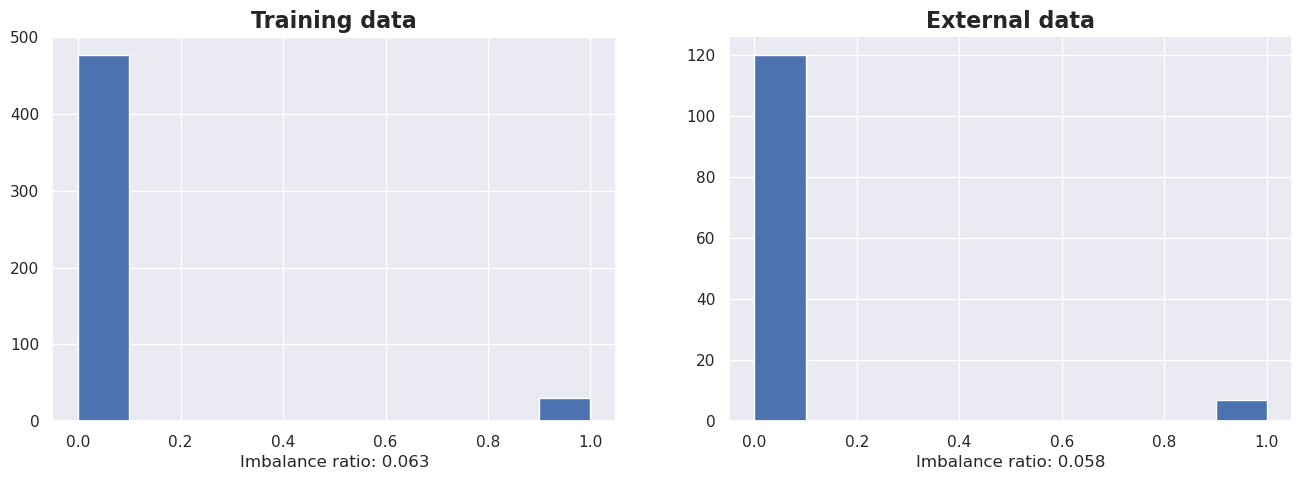

Total duplicated rows-train: 55
Data train before drop duplicates: 507
Data train after drop duplicates: 452
***************************************************************************
Total duplicated rows-test: 5
Data test before drop duplicates: 127
Data test after drop duplicates: 122
***************************************************************************
Index(['1', '2', '3', '4', '5', '6', '14', '16', '18', '34',
       ...
       '39962', '39963', '39964', '39965', '39966', '39967', '39968', '39969',
       '39970', '39971'],
      dtype='object', length=33269)
Total similar columns: 33269
Data train before drop duplicates: (452, 39974)
Data after drop duplicates: (452, 6705)
***************************************************************************
Data test before drop duplicates: (122, 39974)
Data test after drop duplicates: (122, 6705)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Cano

,pChEMBL Value,0,7,8,9,10,11,12,13,15,...,38844,38850,38905,38946,38952,38958,38959,38966,38972,38973


Total row-train with missing value 0


,pChEMBL Value,0,7,8,9,10,11,12,13,15,...,38844,38850,38905,38946,38952,38958,38959,38966,38972,38973


Total row-test with missing value 0
(452, 6703) (452,)
>Threshold=0.00, Features=6702
>Threshold=0.05, Features=3240
>Threshold=0.10, Features=1540
>Threshold=0.15, Features=713
>Threshold=0.20, Features=346


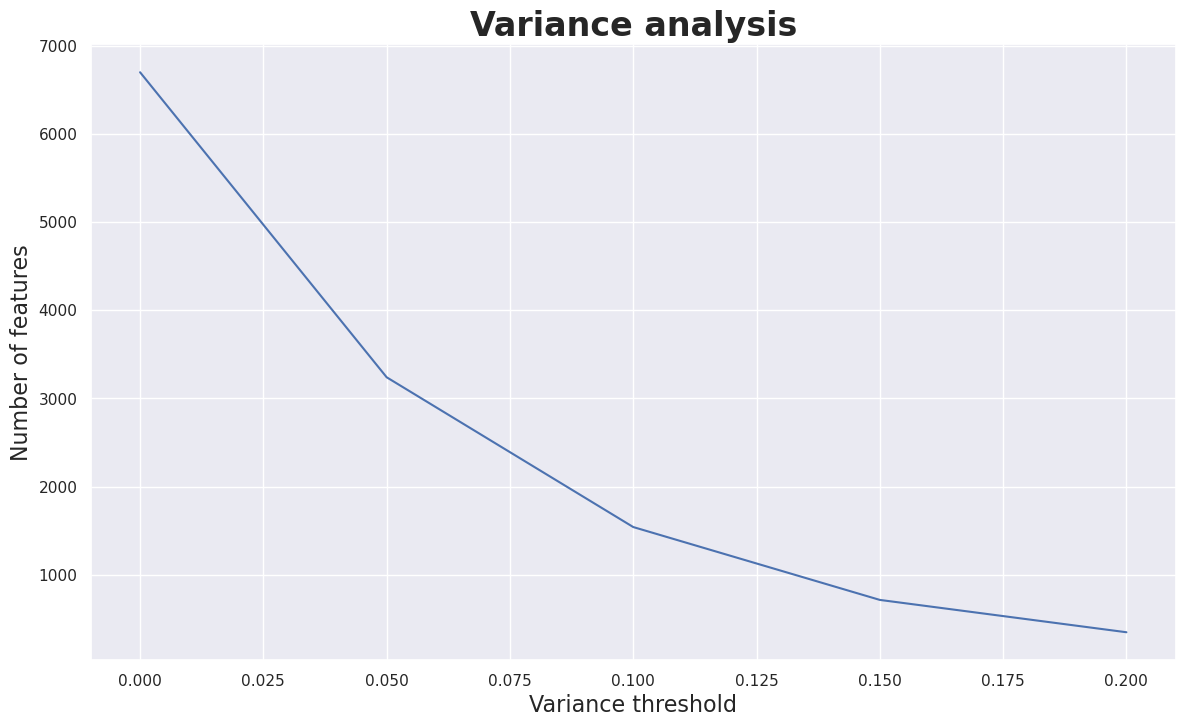

***************************************************************************


,pChEMBL Value,19,20,21,22,24,26,27,29,33,...,37906,37942,37944,37965,37966,37979,38648,38850,38905,38972
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 80
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.482 ± 0.367 (0.667)
>KNN 0.000 ± 0.000 (0.000)
>SVM 0.399 ± 0.368 (0.500)
>RF 0.457 ± 0.346 (0.619)
>ExT 0.486 ± 0.352 (0.583)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.512 ± 0.354 (0.536)
>Grad 0.459 ± 0.365 (0.500)
>XGB 0.469 ± 0.361 (0.619)
>CatB 0.471 ± 0.359 (0.667)
>MLP 0.495 ± 0.376 (0.667)
Data train: (507, 883)
Data test: (127, 883)
***************************************************************************


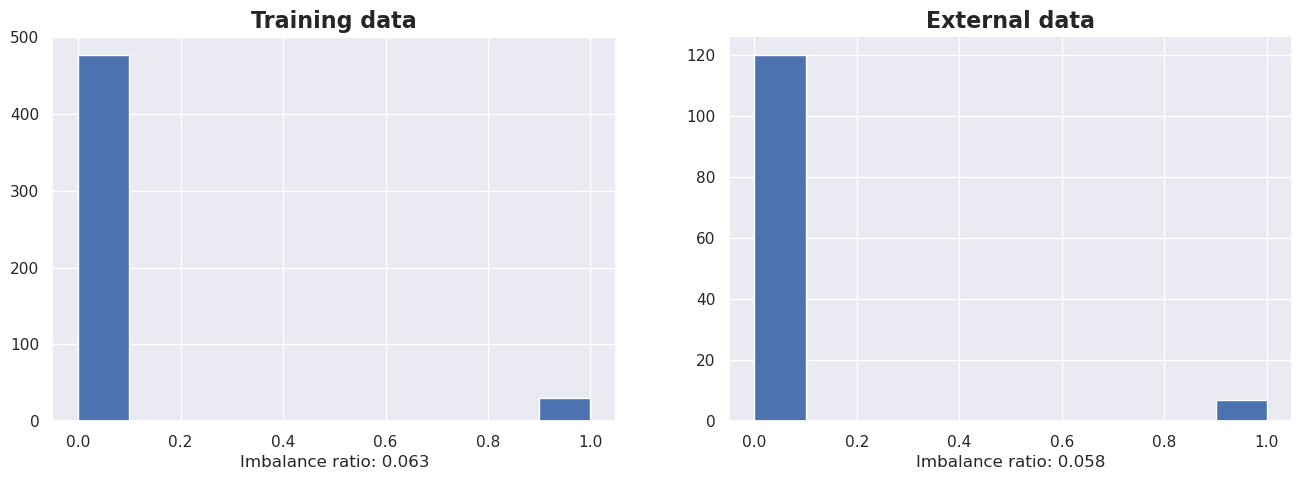

Total duplicated rows-train: 56
Data train before drop duplicates: 507
Data train after drop duplicates: 451
***************************************************************************
Total duplicated rows-test: 3
Data test before drop duplicates: 127
Data test after drop duplicates: 124
***************************************************************************
Index(['1', '2', '3', '4', '5', '6', '7', '8', '13', '22',
       ...
       '871', '872', '873', '874', '875', '876', '877', '878', '879', '880'],
      dtype='object', length=452)
Total similar columns: 452
Data train before drop duplicates: (451, 883)
Data after drop duplicates: (451, 431)
***************************************************************************
Data test before drop duplicates: (124, 883)
Data test after drop duplicates: (124, 431)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles               451          

,pChEMBL Value,0,9,10,11,12,14,15,16,17,...,803,805,812,818,819,821,824,826,839,860


Total row-train with missing value 0


,pChEMBL Value,0,9,10,11,12,14,15,16,17,...,803,805,812,818,819,821,824,826,839,860


Total row-test with missing value 0
(451, 429) (451,)
>Threshold=0.00, Features=427
>Threshold=0.05, Features=303
>Threshold=0.10, Features=243
>Threshold=0.15, Features=157
>Threshold=0.20, Features=112


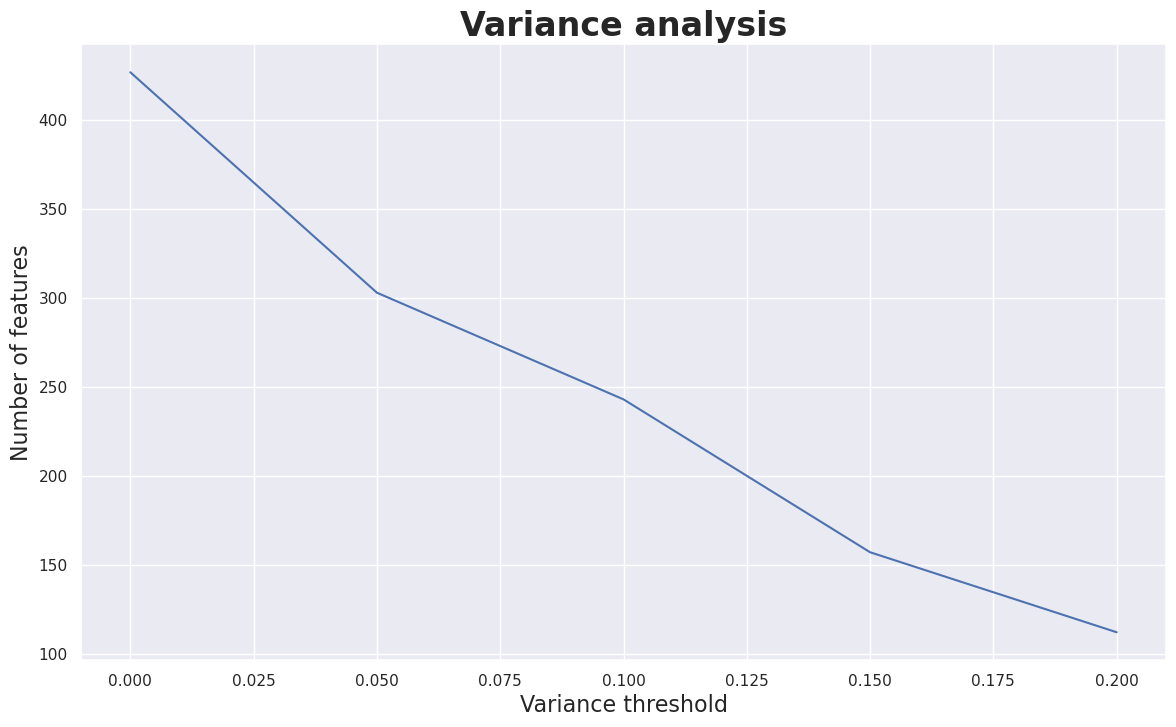

***************************************************************************


,pChEMBL Value,9,10,11,12,14,15,16,18,19,...,776,777,779,797,798,800,818,819,821,824
0,0,1,1,1,1,1,1,0,1,1,...,1,1,0,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
2,1,1,1,1,0,1,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,1,1,0,1,1,...,0,0,1,0,0,1,1,0,0,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 1
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.536 ± 0.307 (0.500)
>KNN 0.322 ± 0.275 (0.500)
>SVM 0.472 ± 0.324 (0.500)
>RF 0.579 ± 0.284 (0.583)
>ExT 0.551 ± 0.266 (0.583)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.557 ± 0.300 (0.583)
>Grad 0.551 ± 0.278 (0.619)
>XGB 0.572 ± 0.295 (0.583)
>CatB 0.549 ± 0.267 (0.500)
>MLP 0.549 ± 0.268 (0.500)
Data train: (507, 2050)
Data test: (127, 2050)
***************************************************************************


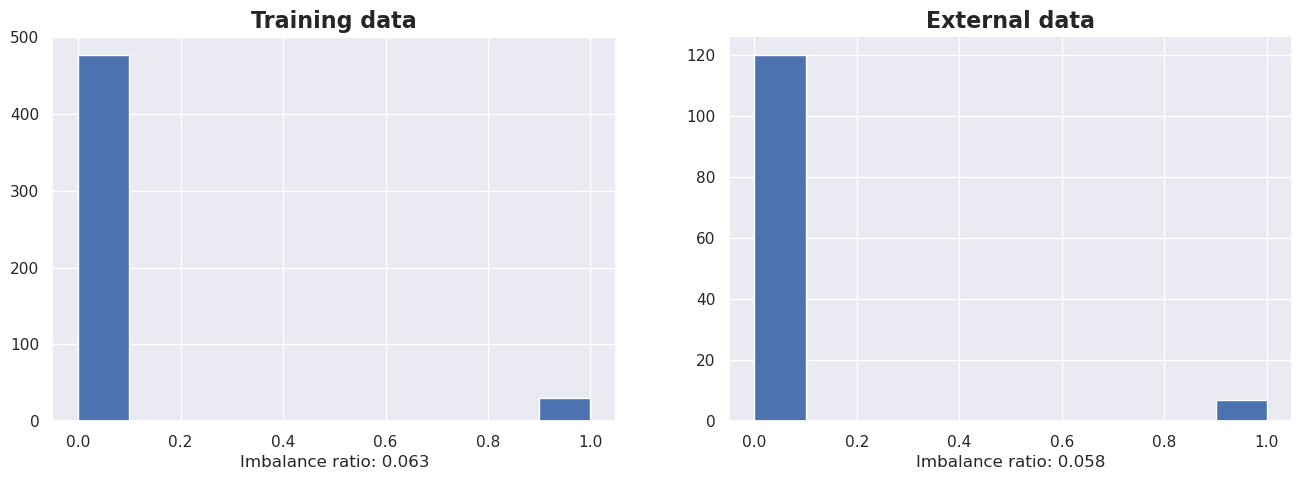

Total duplicated rows-train: 36
Data train before drop duplicates: 507
Data train after drop duplicates: 471
***************************************************************************
Total duplicated rows-test: 5
Data test before drop duplicates: 127
Data test after drop duplicates: 122
***************************************************************************
Index(['250', '267', '330', '396', '586', '643', '1001', '1289', '1304',
       '1324', '1475', '1593', '1813', '1877', '1940', '1978'],
      dtype='object')
Total similar columns: 16
Data train before drop duplicates: (471, 2050)
Data after drop duplicates: (471, 2034)
***************************************************************************
Data test before drop duplicates: (122, 2050)
Data test after drop duplicates: (122, 2034)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles               471           100.0
Drop_cols ['C

,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-test with missing value 0
(471, 2032) (471,)
>Threshold=0.00, Features=2031
>Threshold=0.05, Features=1415
>Threshold=0.10, Features=909
>Threshold=0.15, Features=557
>Threshold=0.20, Features=341


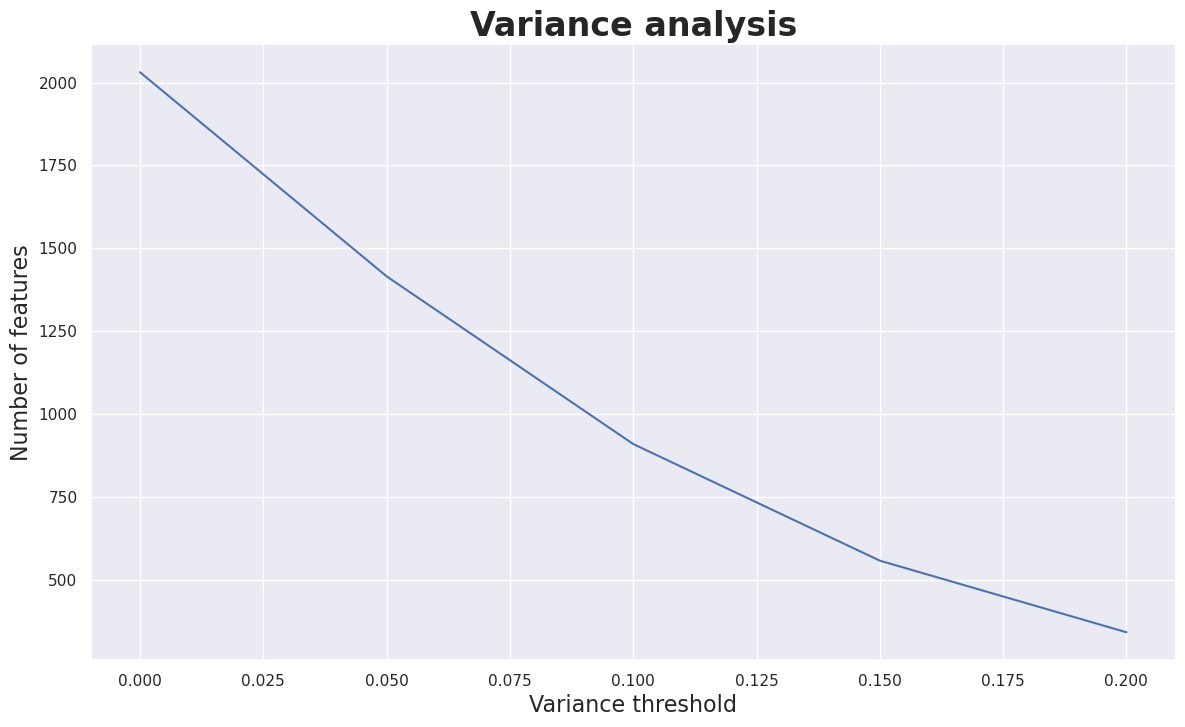

***************************************************************************


,pChEMBL Value,0,1,2,4,5,6,7,8,10,...,2032,2035,2036,2037,2038,2041,2044,2045,2046,2047
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,1,0,1,1,0,0,1,...,0,0,0,1,1,1,1,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,1,0,0,1,...,0,0,0,1,0,0,1,0,0,1


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 23
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.545 ± 0.366 (0.667)
>KNN 0.211 ± 0.301 (0.000)
>SVM 0.562 ± 0.373 (0.667)
>RF 0.527 ± 0.357 (0.619)
>ExT 0.462 ± 0.361 (0.500)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.436 ± 0.311 (0.500)
>Grad 0.473 ± 0.327 (0.500)
>XGB 0.486 ± 0.339 (0.500)
>CatB 0.493 ± 0.351 (0.667)
>MLP 0.510 ± 0.350 (0.619)
Data train: (507, 2050)
Data test: (127, 2050)
***************************************************************************


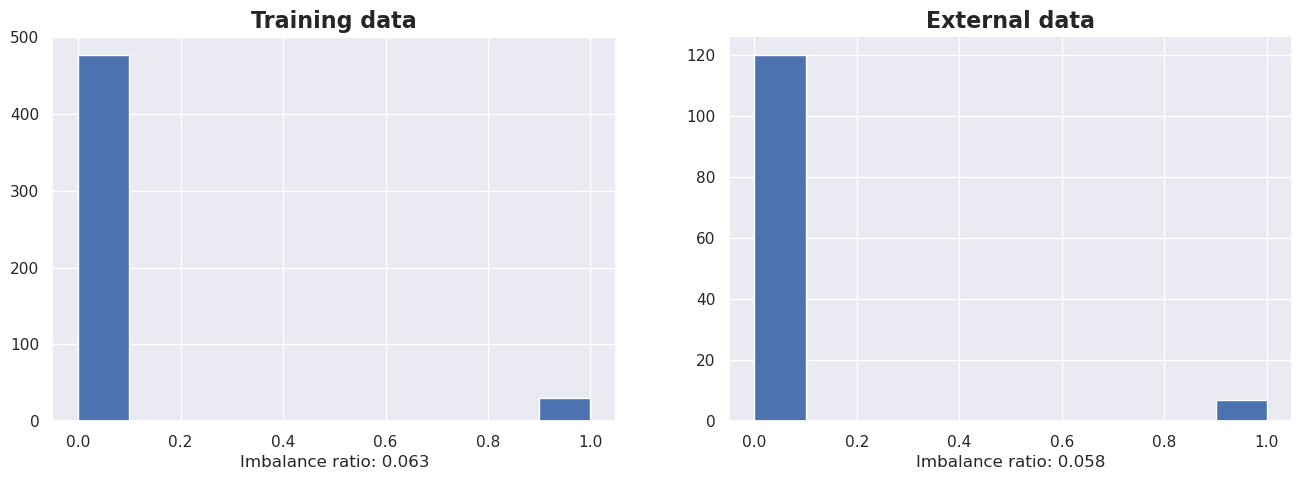

Total duplicated rows-train: 21
Data train before drop duplicates: 507
Data train after drop duplicates: 486
***************************************************************************
Total duplicated rows-test: 2
Data test before drop duplicates: 127
Data test after drop duplicates: 125
***************************************************************************
Index([], dtype='object')
Total similar columns: 0
Data train before drop duplicates: (486, 2050)
Data after drop duplicates: (486, 2050)
***************************************************************************
Data test before drop duplicates: (125, 2050)
Data test after drop duplicates: (125, 2050)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles               486           100.0
Drop_cols ['Canomicalsmiles']
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-test with missing value 0
(486, 2048) (486,)
>Threshold=0.00, Features=2048
>Threshold=0.05, Features=1953
>Threshold=0.10, Features=1631
>Threshold=0.15, Features=1138
>Threshold=0.20, Features=697


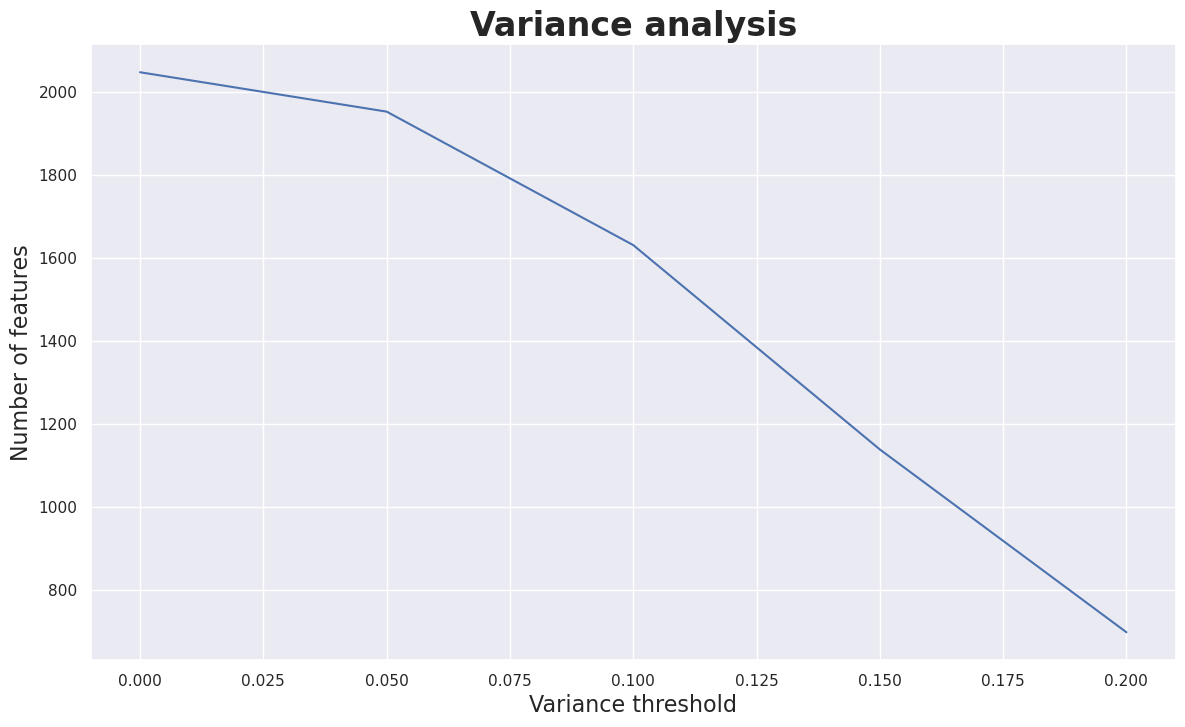

***************************************************************************


,pChEMBL Value,0,1,2,4,5,6,7,8,9,...,2037,2038,2039,2041,2042,2043,2044,2045,2046,2047
0,0,1,0,0,0,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,1
1,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,1,1,0,1,1,0,0,0,...,1,1,0,1,0,1,1,0,0,1
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 36
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.597 ± 0.282 (0.667)
>KNN 0.400 ± 0.309 (0.583)
>SVM 0.627 ± 0.290 (0.667)
>RF 0.620 ± 0.284 (0.667)
>ExT 0.557 ± 0.270 (0.583)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.482 ± 0.255 (0.500)
>Grad 0.494 ± 0.263 (0.500)
>XGB 0.553 ± 0.253 (0.667)
>CatB 0.553 ± 0.281 (0.667)
>MLP 0.546 ± 0.270 (0.583)
Data train: (507, 4098)
Data test: (127, 4098)
***************************************************************************


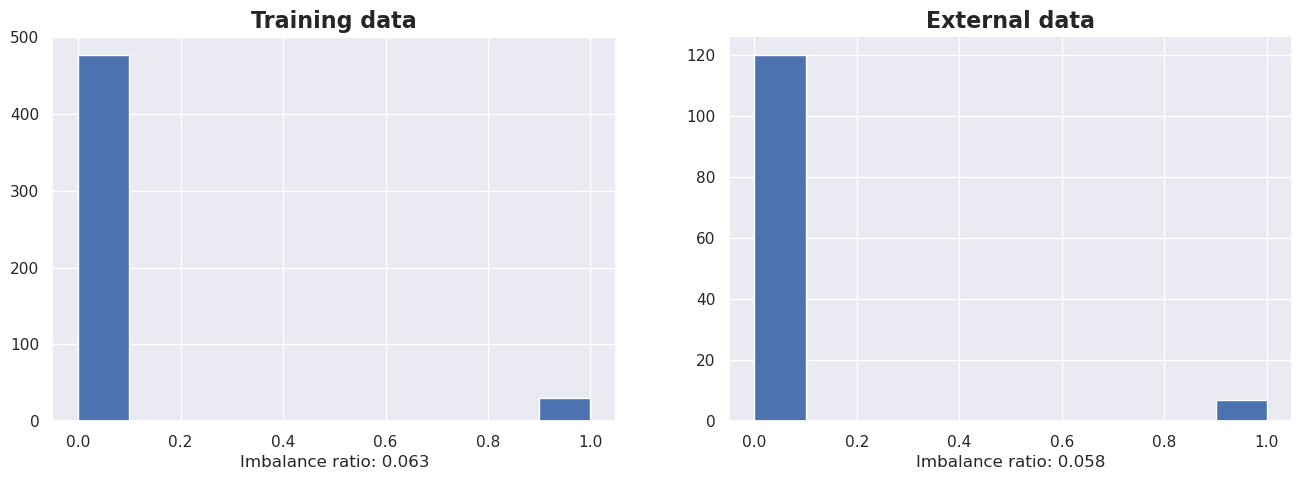

Total duplicated rows-train: 15
Data train before drop duplicates: 507
Data train after drop duplicates: 492
***************************************************************************
Total duplicated rows-test: 1
Data test before drop duplicates: 127
Data test after drop duplicates: 126
***************************************************************************
Index([], dtype='object')
Total similar columns: 0
Data train before drop duplicates: (492, 4098)
Data after drop duplicates: (492, 4098)
***************************************************************************
Data test before drop duplicates: (126, 4098)
Data test after drop duplicates: (126, 4098)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles               492           100.0
Drop_cols ['Canomicalsmiles']
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-test with missing value 0
(492, 4096) (492,)
>Threshold=0.00, Features=4096
>Threshold=0.05, Features=3952
>Threshold=0.10, Features=3133
>Threshold=0.15, Features=2010
>Threshold=0.20, Features=1062


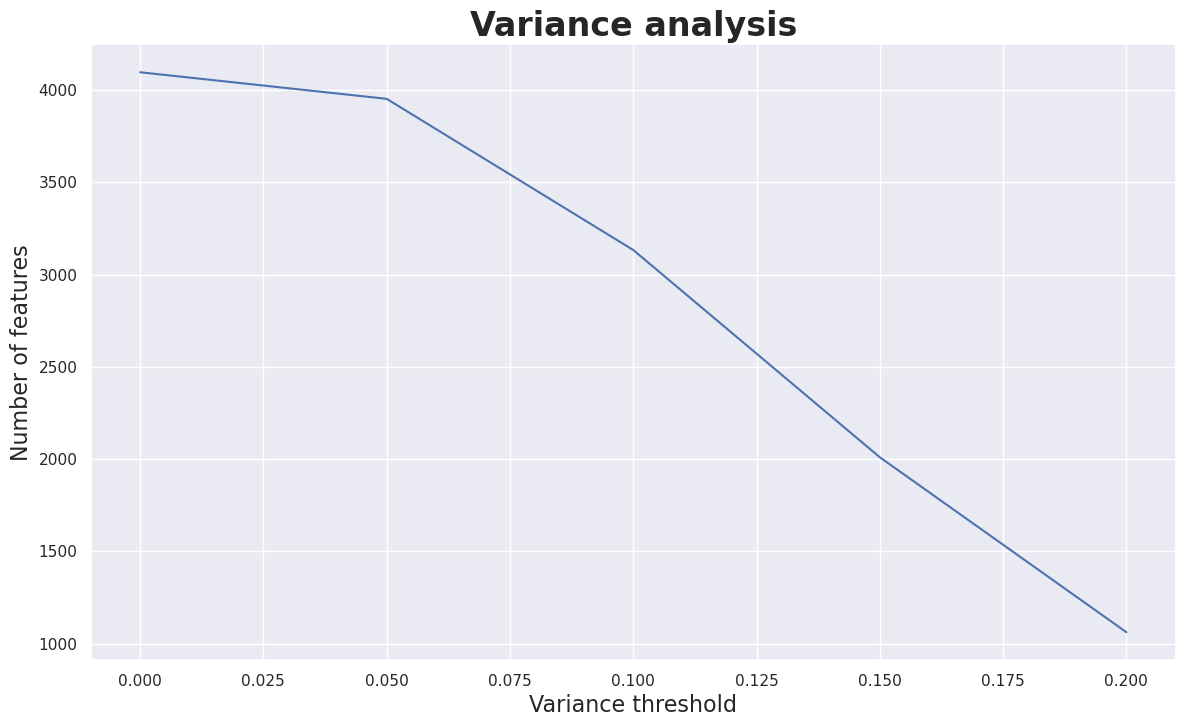

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,1,1,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,1,1,0,0,1,1,0,0,...,1,0,0,1,1,0,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,1,0,1,0,1,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 53
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.591 ± 0.333 (0.667)
>KNN 0.089 ± 0.227 (0.000)
>SVM 0.649 ± 0.363 (0.667)
>RF 0.649 ± 0.363 (0.667)
>ExT 0.569 ± 0.298 (0.667)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.538 ± 0.312 (0.536)
>Grad 0.538 ± 0.314 (0.583)
>XGB 0.576 ± 0.331 (0.667)
>CatB 0.637 ± 0.359 (0.667)
>MLP 0.561 ± 0.332 (0.667)
Data train: (507, 211)
Data test: (127, 211)
***************************************************************************


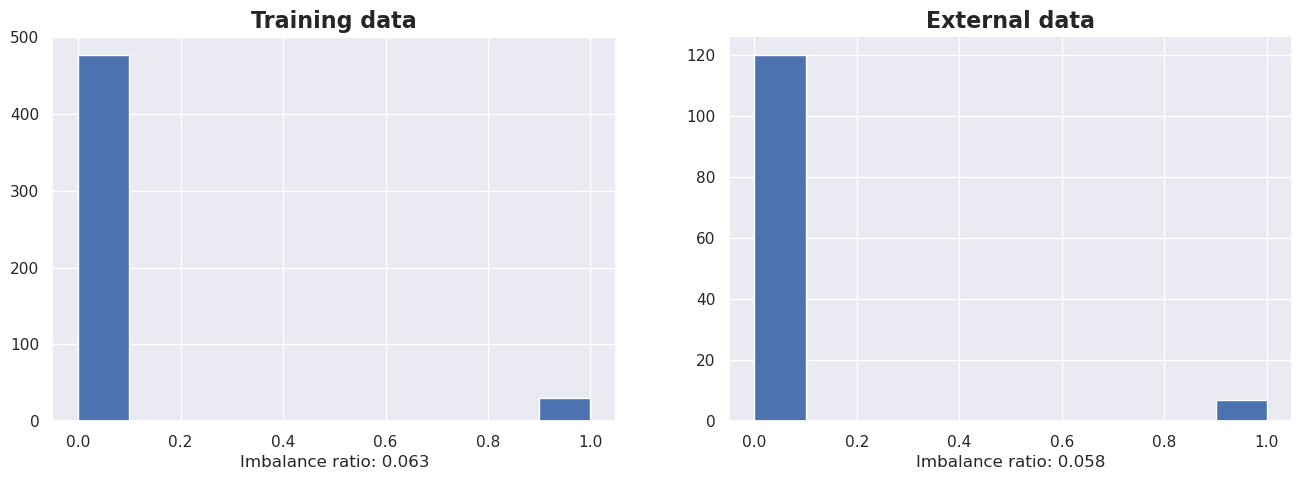

Total duplicated rows-train: 11
Data train before drop duplicates: 507
Data train after drop duplicates: 496
***************************************************************************
Total duplicated rows-test: 1
Data test before drop duplicates: 127
Data test after drop duplicates: 126
***************************************************************************
Index(['MaxEStateIndex', 'SMR_VSA8', 'SlogP_VSA9', 'fr_COO2', 'fr_Nhpyrrole',
       'fr_azide', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine',
       'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_isocyan',
       'fr_isothiocyan', 'fr_nitro_arom', 'fr_nitroso', 'fr_phos_acid',
       'fr_phos_ester', 'fr_prisulfonamd', 'fr_term_acetylene', 'fr_tetrazole',
       'fr_thiocyan'],
      dtype='object')
Total similar columns: 22
Data train before drop duplicates: (496, 211)
Data after drop duplicates: (496, 189)
***************************************************************************
Data test before drop duplicates: 

,pChEMBL Value,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_priamide,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea


Total row-train with missing value 0


,pChEMBL Value,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_priamide,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea


Total row-test with missing value 0
(496, 187) (496,)
>Threshold=0.00, Features=186
>Threshold=0.05, Features=148
>Threshold=0.10, Features=140
>Threshold=0.15, Features=135
>Threshold=0.20, Features=130
>Threshold=0.25, Features=123
>Threshold=0.30, Features=122
>Threshold=0.35, Features=121
>Threshold=0.40, Features=117
>Threshold=0.45, Features=116
>Threshold=0.50, Features=115
>Threshold=0.55, Features=113
>Threshold=0.60, Features=111
>Threshold=0.65, Features=108
>Threshold=0.70, Features=107
>Threshold=0.75, Features=107
>Threshold=0.80, Features=106
>Threshold=0.85, Features=106
>Threshold=0.90, Features=106
>Threshold=0.95, Features=105


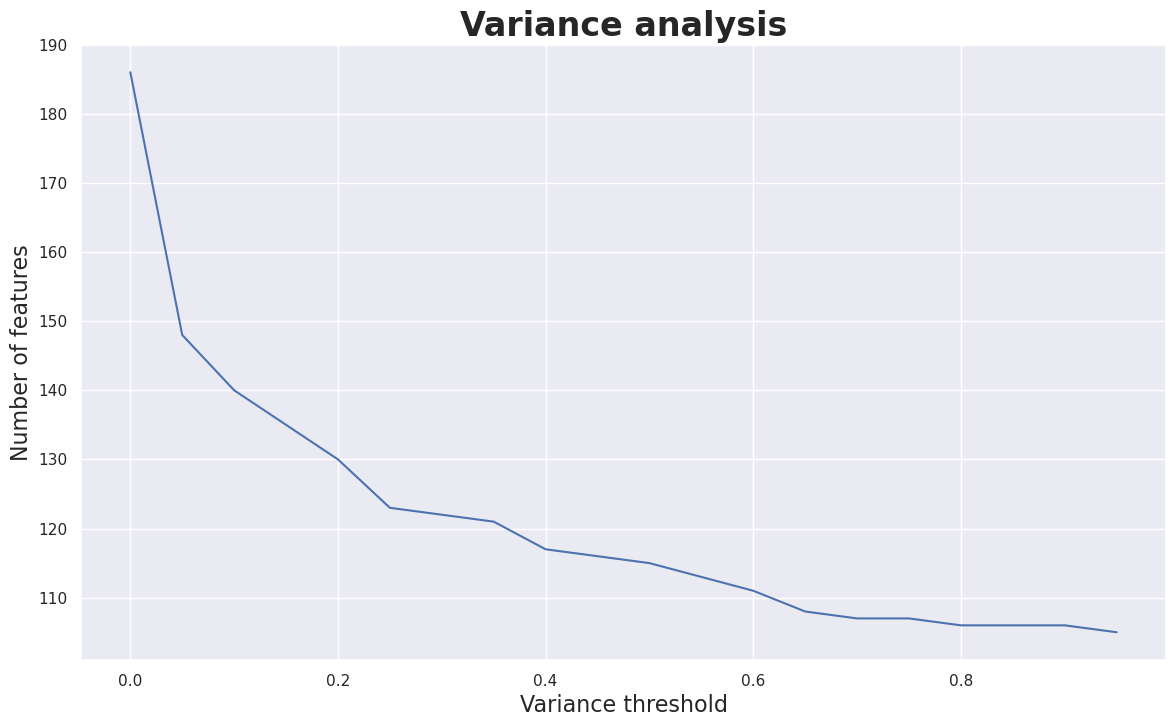

***************************************************************************


,pChEMBL Value,MaxAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan1,FpDensityMorgan2,...,fr_lactone,fr_methoxy,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_priamide,fr_pyridine,fr_unbrch_alkane,fr_urea
0,0,13.622088,-2.822071,0.396894,444.440,420.248,444.153266,170.0,1.093750,1.718750,...,0,0,0,1,1,0,1,0,0.0,0
1,0,9.336439,-0.175103,0.757381,261.129,255.081,259.946556,78.0,1.000000,1.733333,...,0,0,0,2,2,0,0,0,0.0,0
2,1,14.905039,-0.554518,0.549848,448.498,423.298,448.191069,170.0,1.090909,1.787879,...,1,0,0,0,0,0,0,1,0.0,0
3,0,12.055244,-1.262251,0.292986,280.305,268.209,280.051778,100.0,1.421053,2.105263,...,0,0,0,0,0,0,0,0,0.0,0
4,0,12.210840,-0.414377,0.923465,330.384,308.208,330.157957,128.0,1.250000,2.041667,...,1,0,0,0,0,0,0,0,0.0,0


Remove by IQR without handling
Total data remove on Train 471
Total data remove on Test 121
Number of good features: 12
Number of bad features with data remove > 0: 86
***************************************************************************
Uniform Transformer technique
Total data remove on Train 209
Total data remove on Test 67
Number of good features: 93
Number of bad features with data remove > 0: 5
***************************************************************************
Handling with KBin method
////// ['PEOE_VSA5', 'SlogP_VSA12', 'SlogP_VSA7', 'VSA_EState10', 'fr_unbrch_alkane'] 5
Total data remove on Train 0
Total data remove on Test 1
Number of good features: 93
Number of bad features with data remove > 0: 0
***************************************************************************
***************************************************************************
Total outlier remove by LOF: 3
***************************************************************************
Scaling me

/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.488 ± 0.243 (0.500)
>Grad 0.418 ± 0.289 (0.450)
>XGB 0.482 ± 0.298 (0.500)
>CatB 0.476 ± 0.281 (0.500)
>MLP 0.512 ± 0.284 (0.500)
Data train: (507, 2050)
Data test: (127, 2050)
***************************************************************************


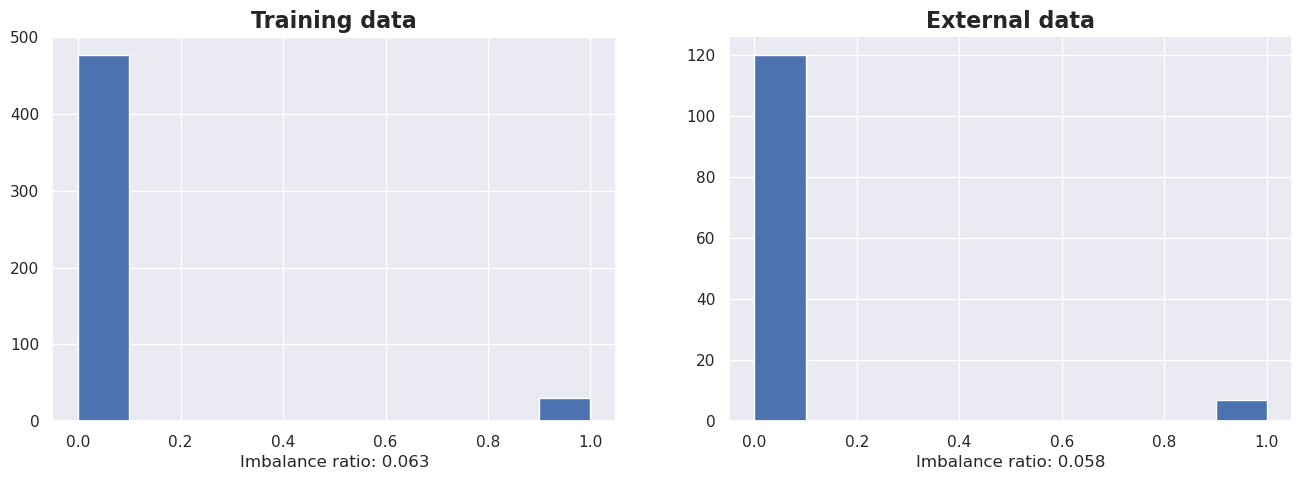

Total duplicated rows-train: 9
Data train before drop duplicates: 507
Data train after drop duplicates: 498
***************************************************************************
Total duplicated rows-test: 1
Data test before drop duplicates: 127
Data test after drop duplicates: 126
***************************************************************************
Index(['8', '26', '42', '70', '73', '95', '105', '114', '117', '118',
       ...
       '1925', '1931', '1960', '1975', '1988', '1990', '2031', '2032', '2041',
       '2044'],
      dtype='object', length=209)
Total similar columns: 209
Data train before drop duplicates: (498, 2050)
Data after drop duplicates: (498, 1841)
***************************************************************************
Data test before drop duplicates: (126, 2050)
Data test after drop duplicates: (126, 1841)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmi

,pChEMBL Value,0,1,2,3,4,5,6,7,9,...,2036,2037,2038,2039,2040,2042,2043,2045,2046,2047


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,9,...,2036,2037,2038,2039,2040,2042,2043,2045,2046,2047


Total row-test with missing value 0
(498, 1839) (498,)
>Threshold=0.00, Features=1838
>Threshold=0.05, Features=266
>Threshold=0.10, Features=96
>Threshold=0.15, Features=53
>Threshold=0.20, Features=31


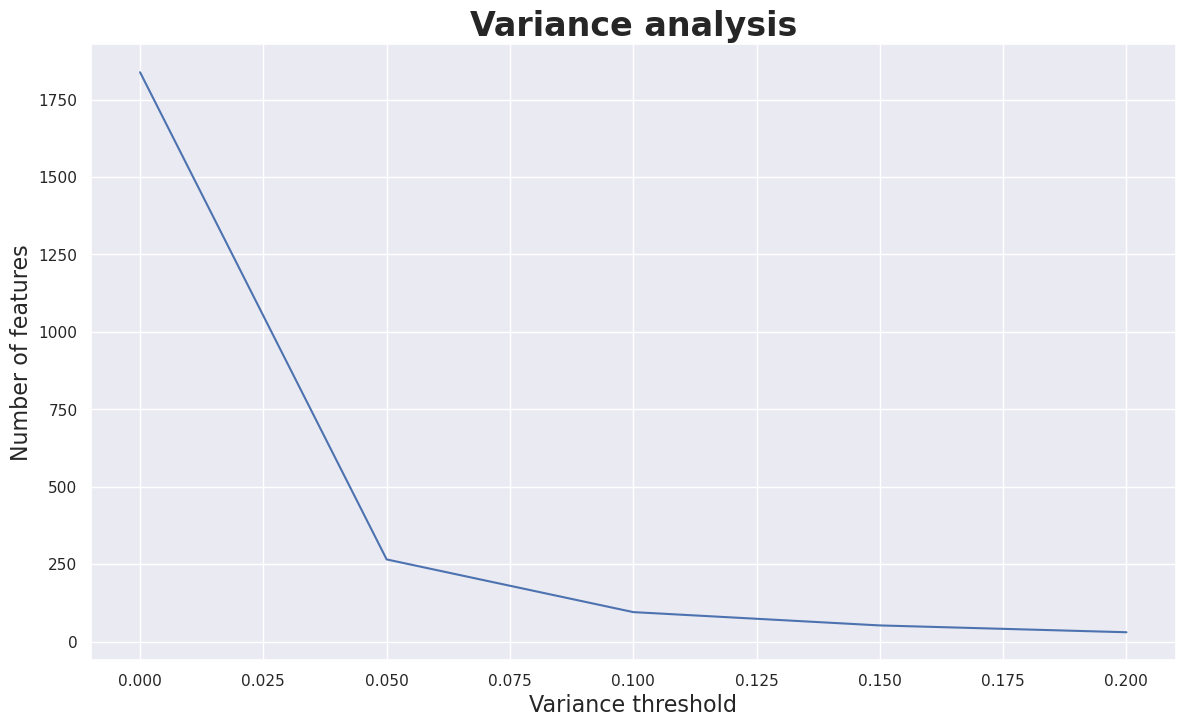

***************************************************************************


,pChEMBL Value,3,16,20,23,38,75,78,82,85,...,1987,1989,1991,2000,2008,2022,2028,2029,2037,2040
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 0
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.634 ± 0.233 (0.500)
>KNN 0.340 ± 0.224 (0.500)
>SVM 0.566 ± 0.236 (0.500)
>RF 0.518 ± 0.287 (0.500)
>ExT 0.542 ± 0.266 (0.500)


/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/labhhc1/anaconda3/envs/nghi/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

>Ada 0.616 ± 0.257 (0.583)
>Grad 0.556 ± 0.281 (0.500)
>XGB 0.621 ± 0.223 (0.536)
>CatB 0.554 ± 0.301 (0.536)
>MLP 0.617 ± 0.251 (0.571)
(15, 300)
META DATA SAVING...
Avalon     0.539
Cats2d     0.272
ECFP2      0.382
ECFP4      0.446
ECFP6      0.471
MACCs      0.498
Map4       0.528
Mordred    0.483
Ph4        0.423
Pubchem    0.524
RDK5       0.471
RDK6       0.543
RDK7       0.540
RDKdes     0.465
Secfp      0.556
dtype: float64
(15, 30)
META DATA SAVING...
Avalon     0.623
Cats2d     0.377
ECFP2      0.469
ECFP4      0.547
ECFP6      0.515
MACCs      0.608
Map4       0.554
Mordred    0.540
Ph4        0.512
Pubchem    0.579
RDK5       0.562
RDK6       0.627
RDK7       0.649
RDKdes     0.512
Secfp      0.634
dtype: float64
(15, 300)
META DATA SAVING...
Avalon     0.539
Cats2d     0.272
ECFP2      0.382
ECFP4      0.446
ECFP6      0.471
MACCs      0.498
Map4       0.528
Mordred    0.483
Ph4        0.423
Pubchem    0.524
RDK5       0.471
RDK6       0.543
RDK7       0.540
RDKdes     0.

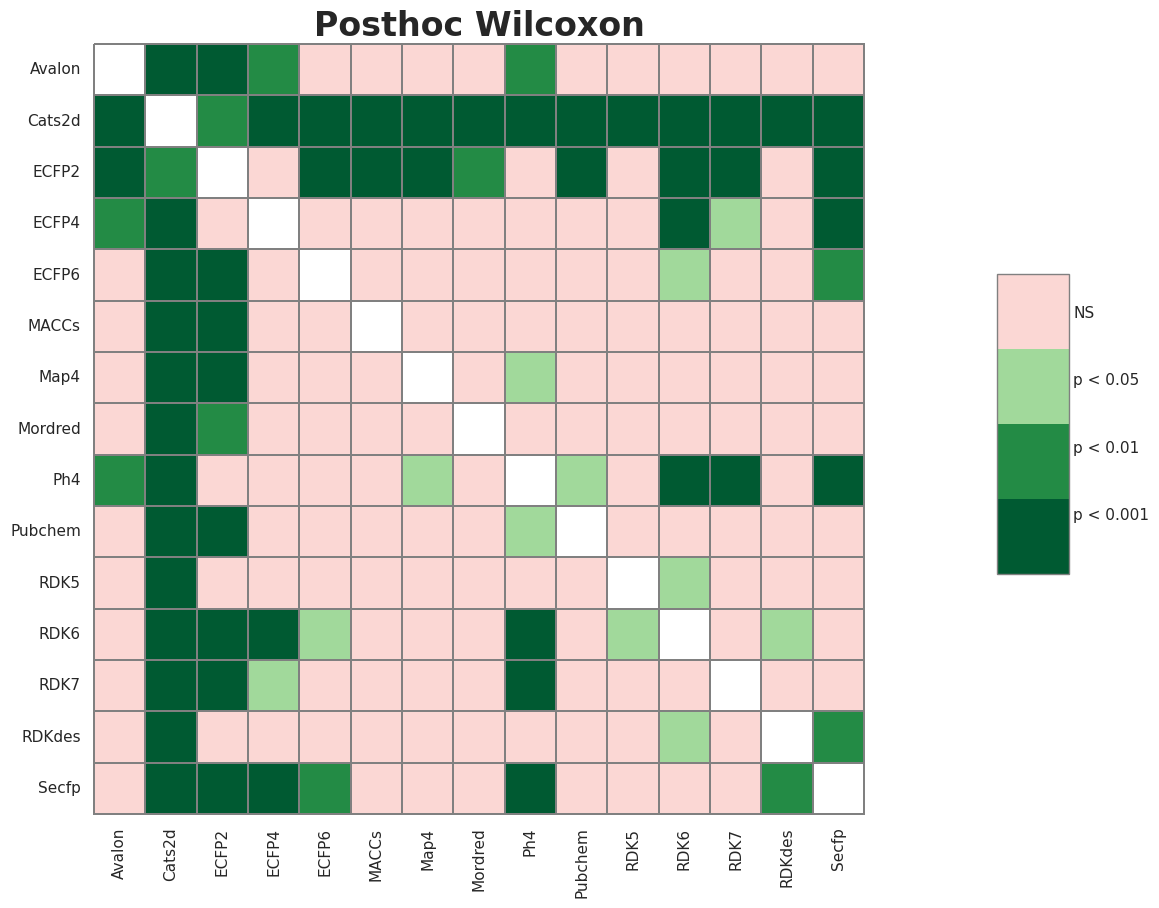

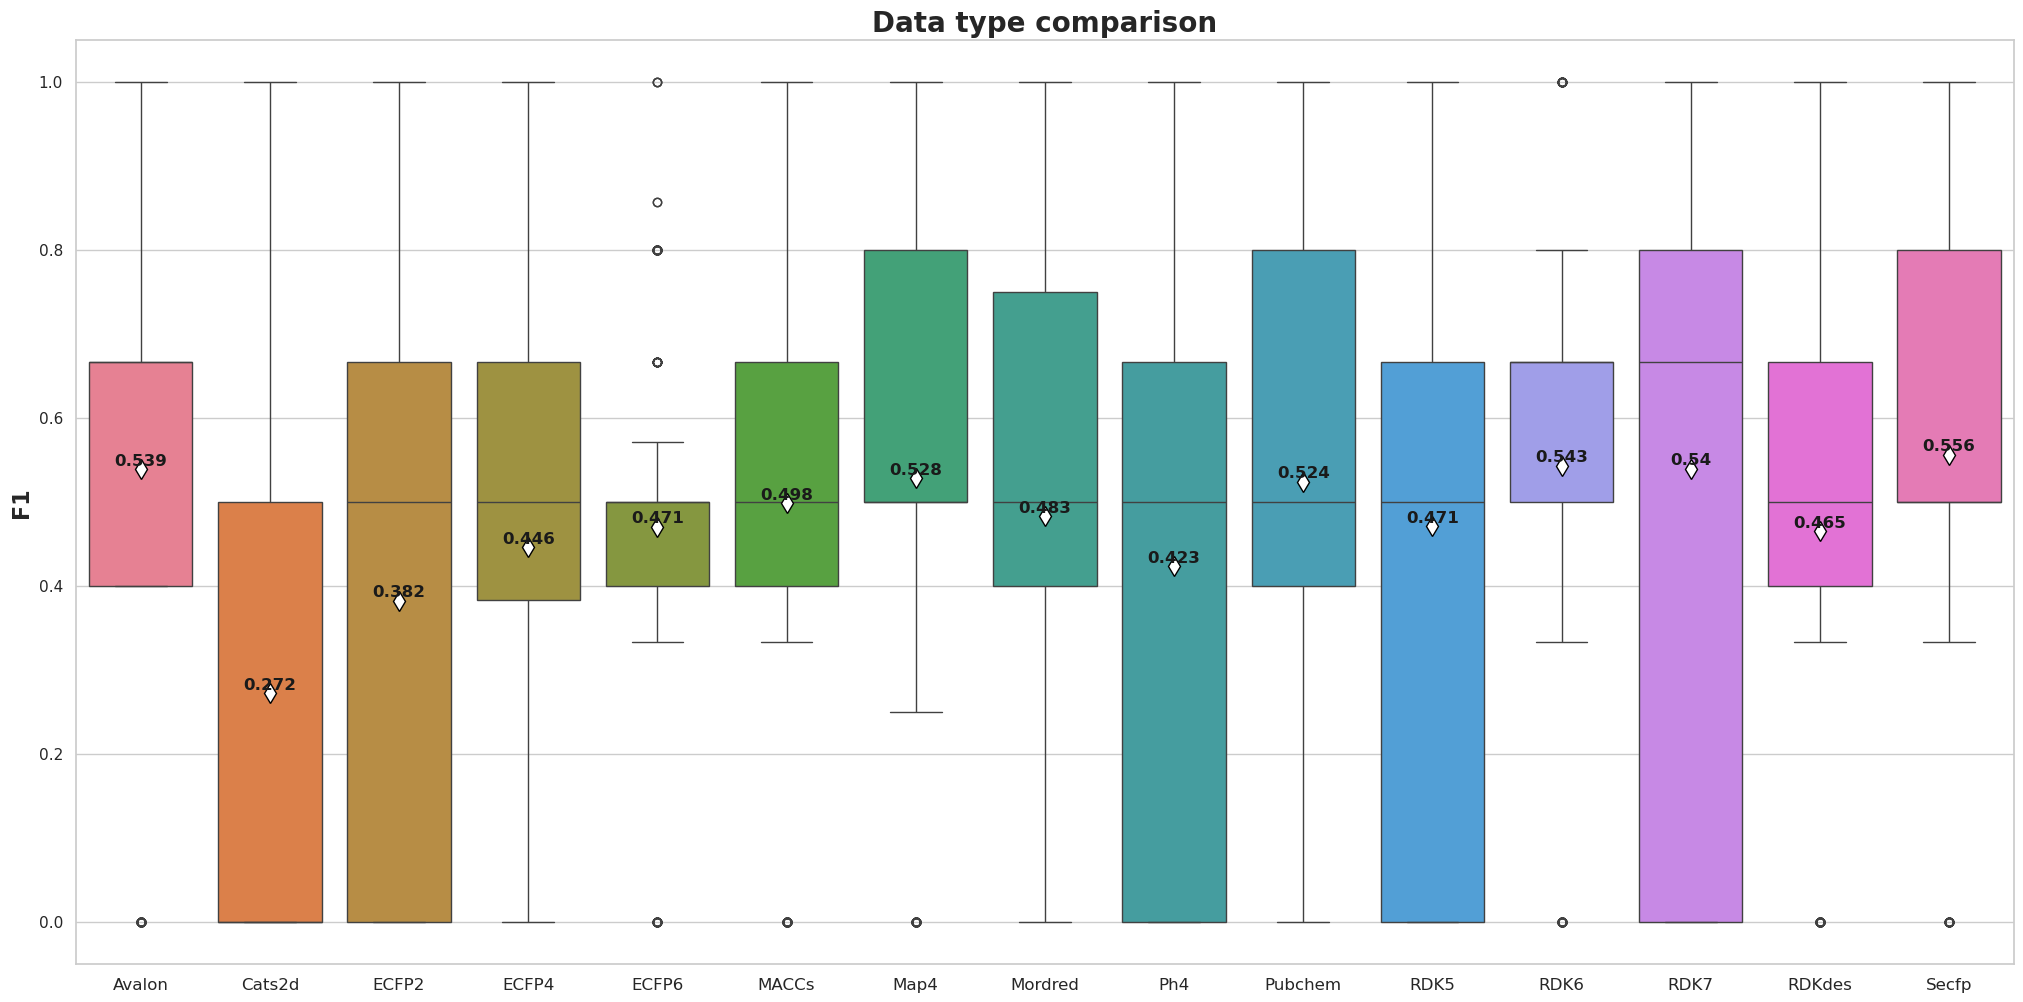

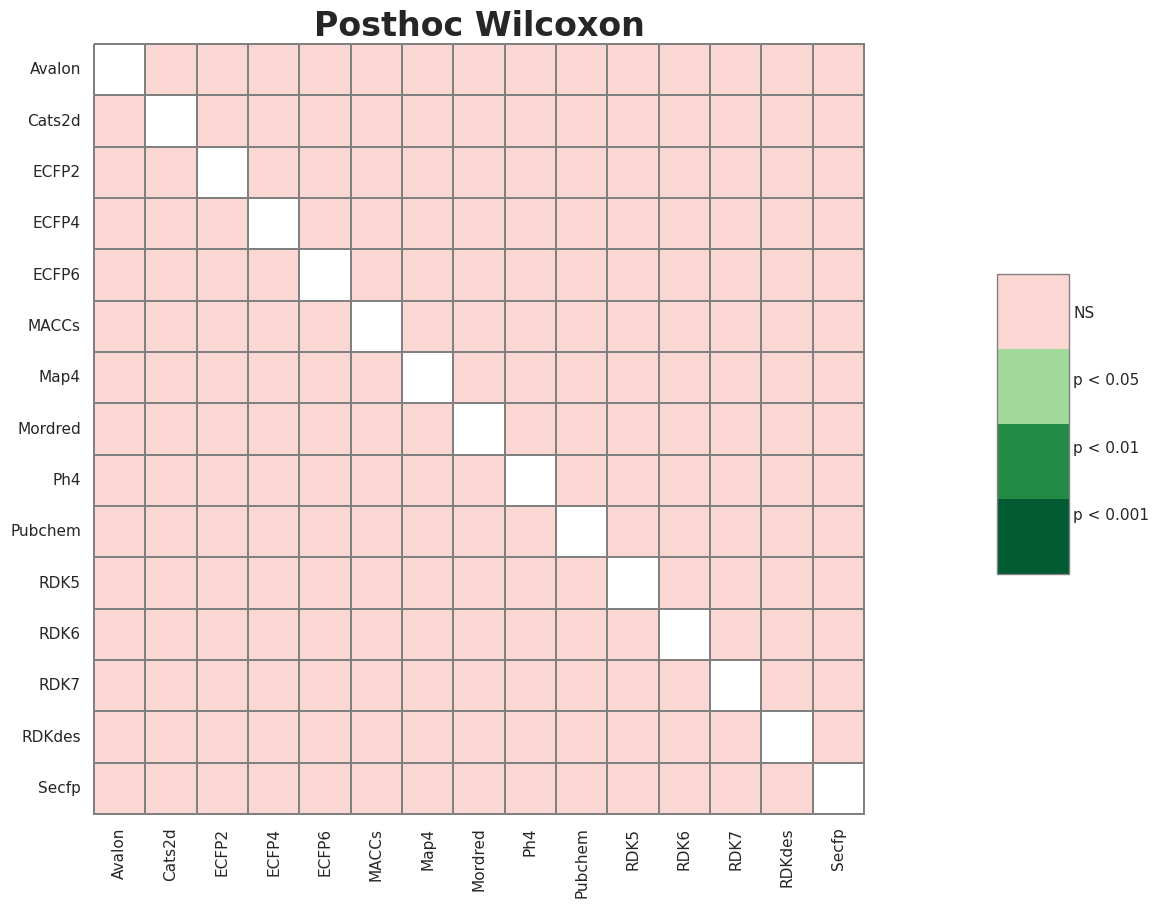

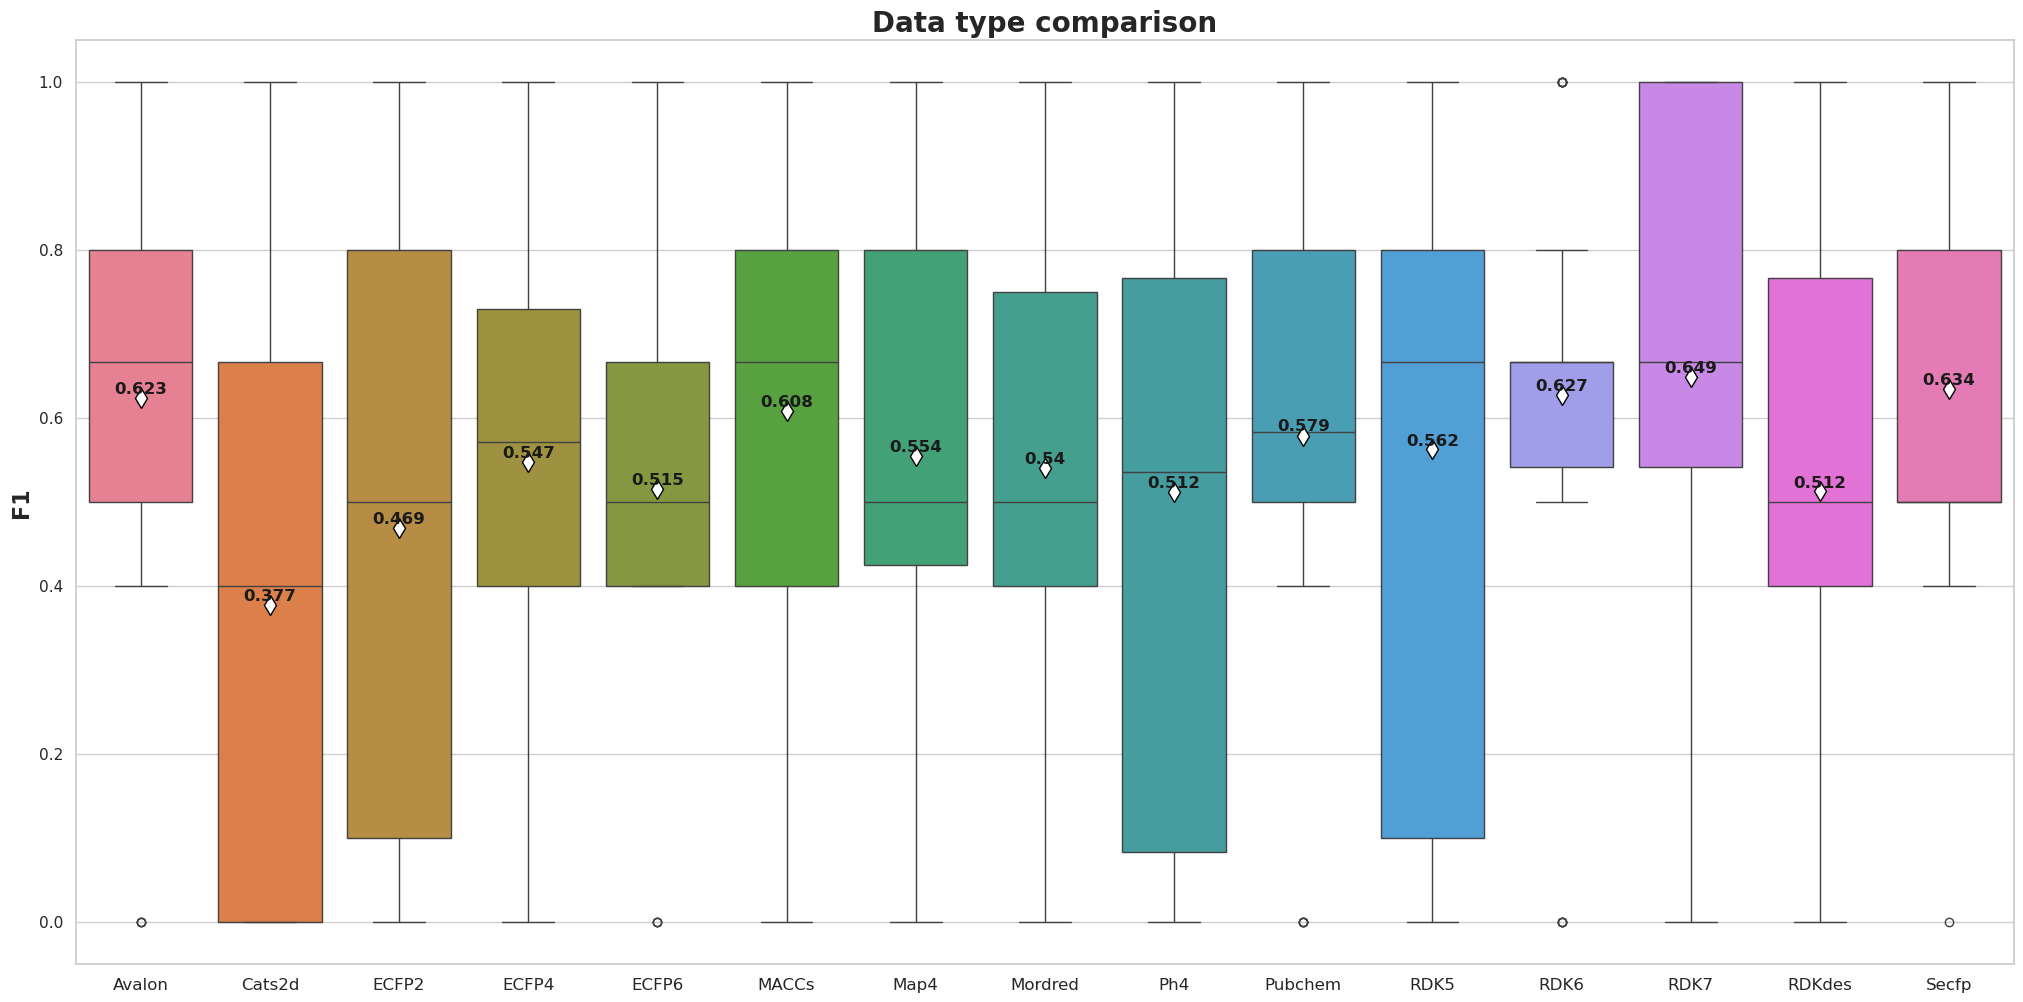

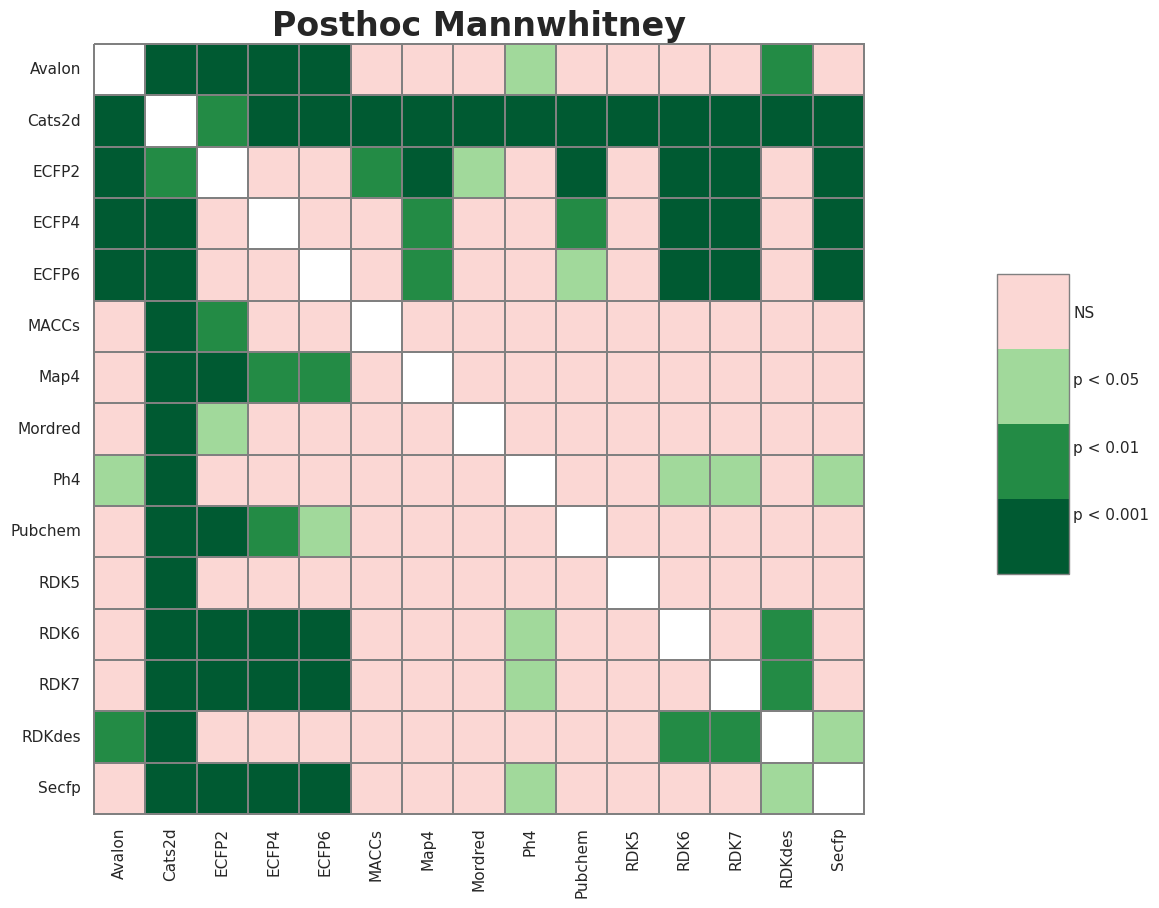

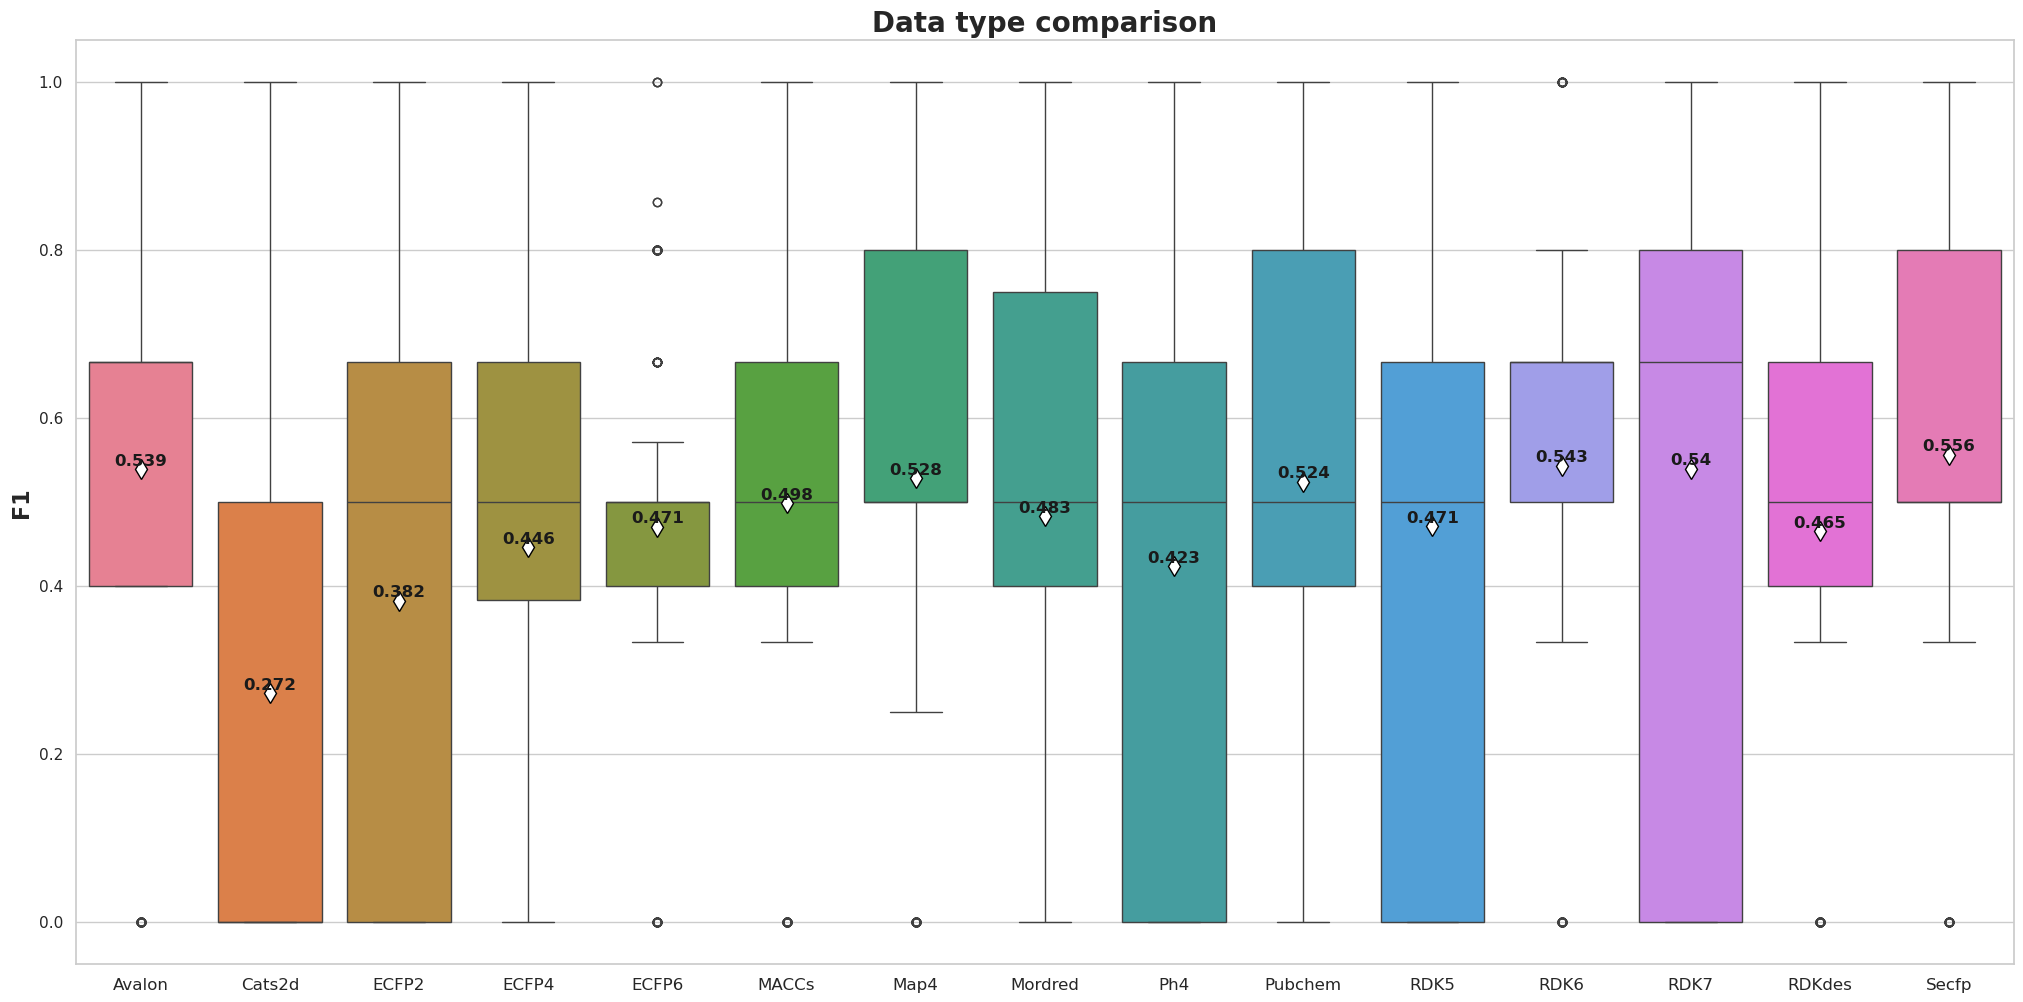

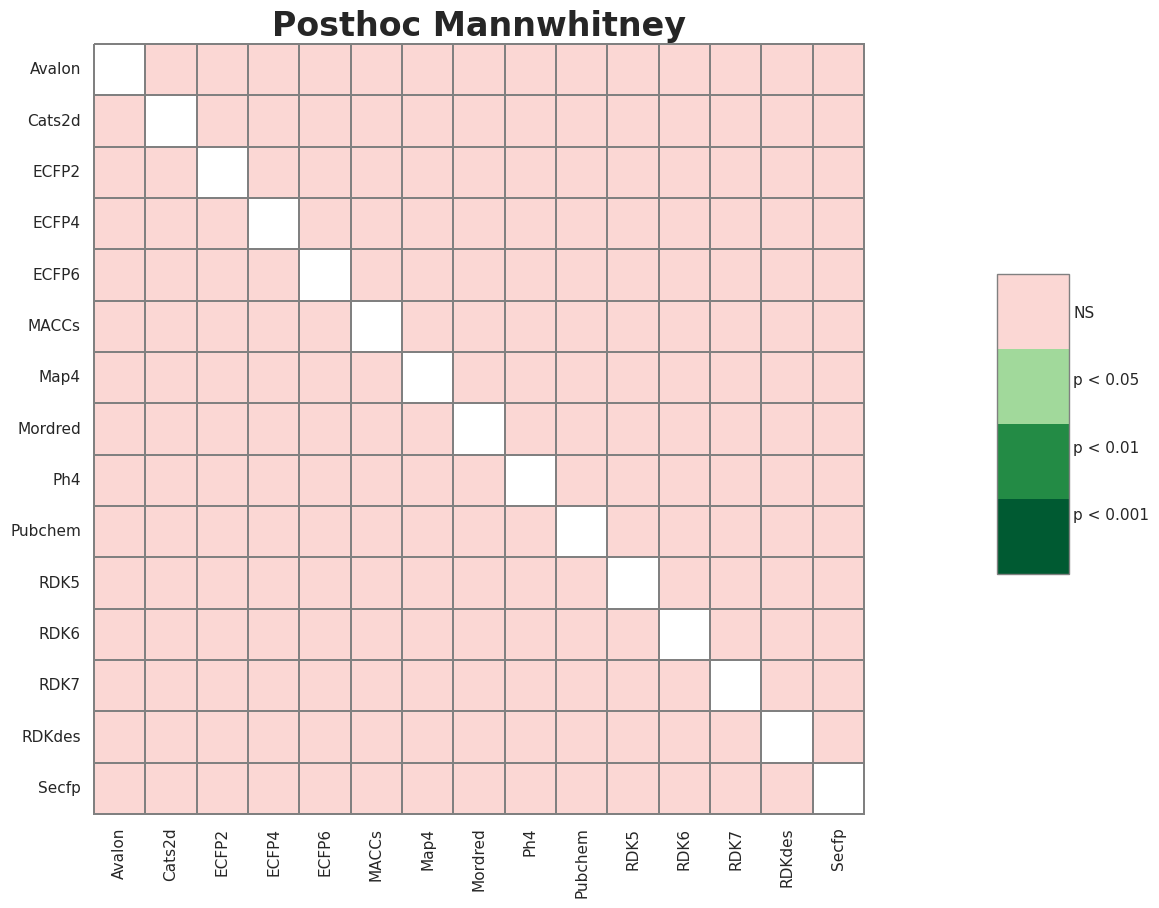

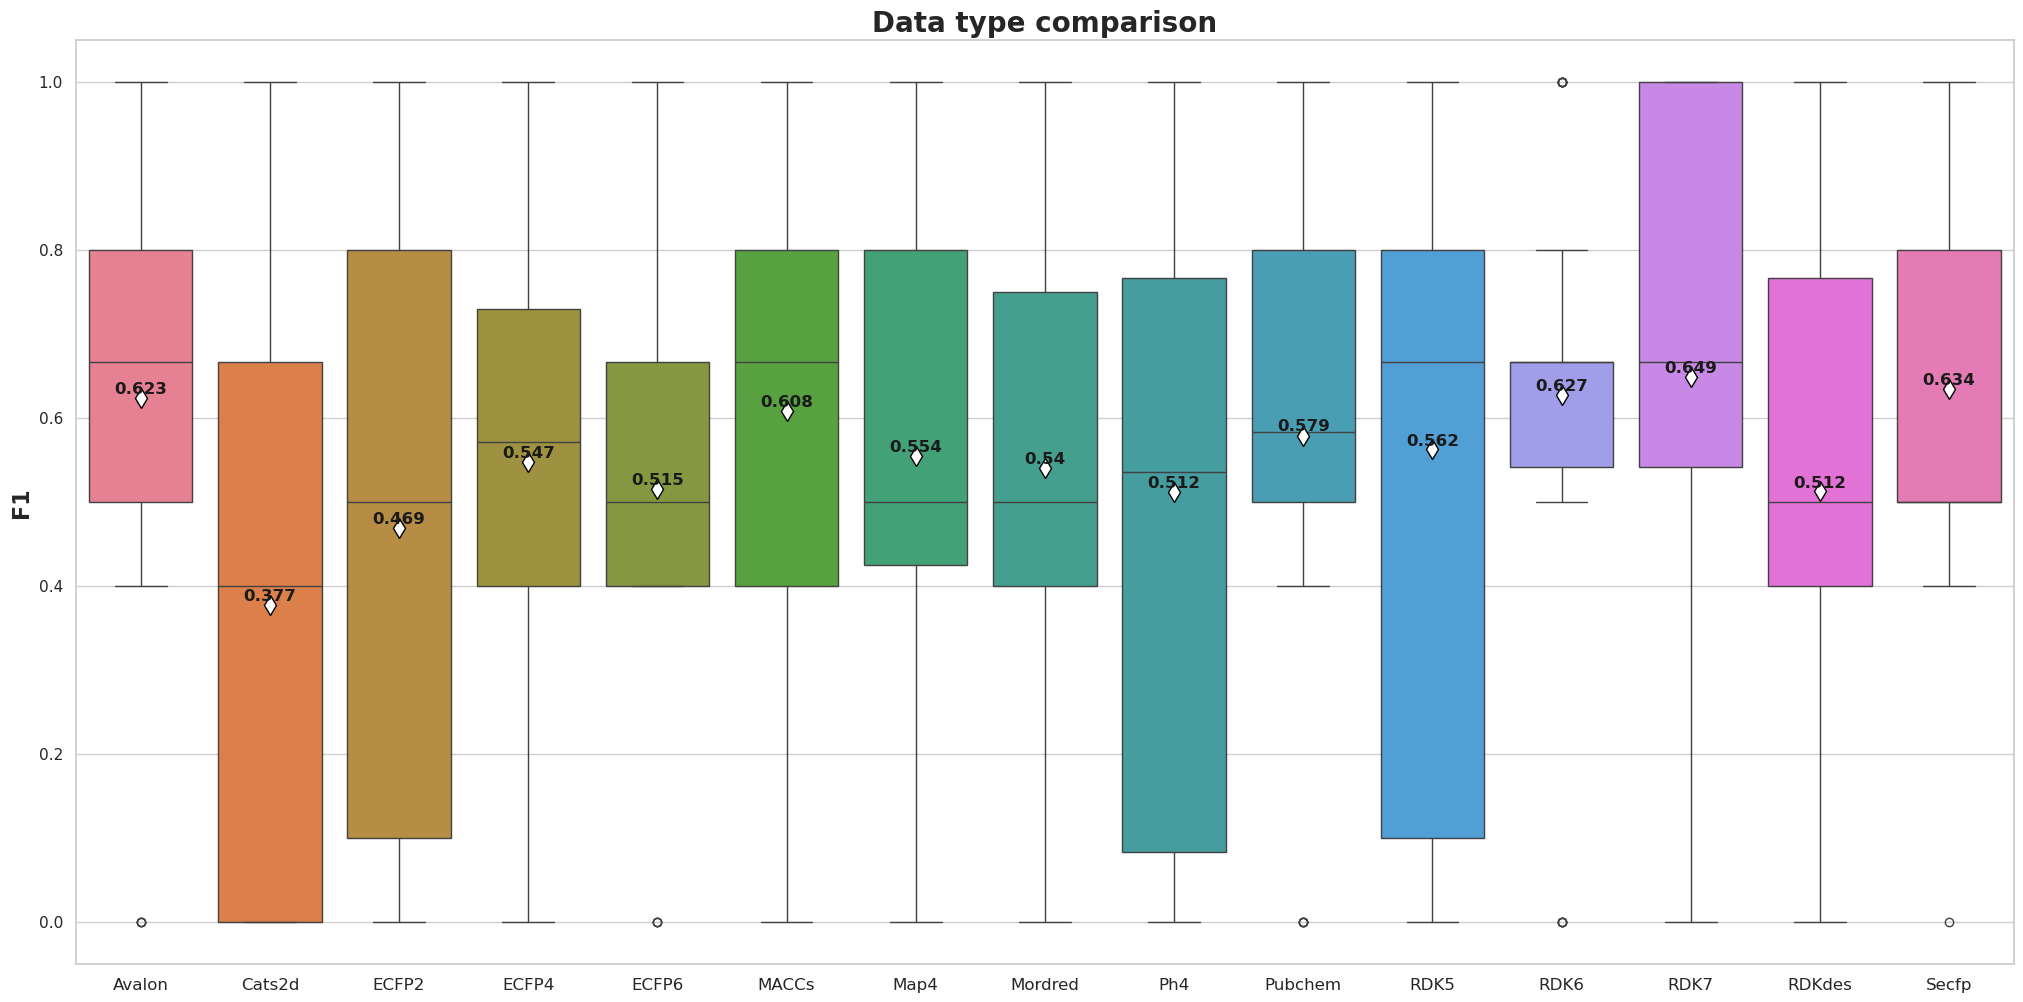

In [12]:
# data_path = os.getcwd() + '/raw_data_features'
data_path='/home/labhhc1/Documents/Workspace/D20/Nghi/HIV_IN_Classification_ML/Data_posthoc/raw_data_features'
# data_path = os.getcwd()
pip  = QSAR_pipeline(data_path=data_path,  task_type ='C', scoring ='f1',kind_analysis =['Meta','Subgroup'],
                     activity_col='pChEMBL Value', save_data = True, target_thresh=7, posthoc_method =['Wilcoxon', 'Mannwhitney'])
pip.fit()

In [6]:
import pandas as pd

# Example DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'c': [5, 6], 'd': [7, 8]})

# Using pd.concat() instead of append()
df_combined = pd.concat([df1, df2], axis = 1)

print(df_combined)


   A  B  c  d
0  1  3  5  7
1  2  4  6  8
